<a href="https://colab.research.google.com/github/euneun316/Kaggle/blob/main/Titanic-Machine_Learning_from_Disaster/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

- kaggle에서 제공하는 타이타닉 데이터를 통해 생존자와 사망자를 예측

# 1.Kaggle Titanic Data Import

In [ ]:
!pip install kaggle

In [ ]:
# Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=dc5e4df2660c5c1132279a49be3037f28839f3d69d1c4bc3b5ce150ff6ccbe82
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Create New API Token
# kaggle.json 업로드
from google.colab import files
files.upload()

In [ ]:
!ls -al

total 198
-rw------- 1 root root   3258 Jan 19 04:46 gender_submission.csv
-rw------- 1 root root     63 Jan 27 21:17 kaggle.json
-rw------- 1 root root  28629 Jan 19 04:46 test.csv
-rw------- 1 root root 108268 Jan 27 17:27 titanic3.csv
-rw------- 1 root root  61194 Jan 19 04:46 train.csv


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!!ls -al ~/

['total 72',
 'drwx------ 1 root root 4096 Jan 27 21:13 .',
 'drwxr-xr-x 1 root root 4096 Jan 27 16:51 ..',
 '-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc',
 'drwxr-xr-x 1 root root 4096 Jan 27 21:13 .cache',
 'drwxr-xr-x 1 root root 4096 Jan 27 16:52 .config',
 'drwxr-xr-x 3 root root 4096 Jan 25 14:12 .gsutil',
 'drwxr-xr-x 1 root root 4096 Jan 25 14:40 .ipython',
 'drwx------ 2 root root 4096 Jan 25 14:40 .jupyter',
 'drwxr-xr-x 2 root root 4096 Jan 27 21:14 .kaggle',
 'drwxr-xr-x 2 root root 4096 Jan 27 16:52 .keras',
 'drwx------ 1 root root 4096 Jan 25 14:40 .local',
 'drwxr-xr-x 4 root root 4096 Jan 25 14:40 .npm',
 '-rw-r--r-- 1 root root  148 Aug 17  2015 .profile',
 '-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf']

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -al ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Jan 27 21:14 .
drwx------ 1 root root 4096 Jan 27 21:13 ..
-rw------- 1 root root   63 Jan 27 21:18 kaggle.json


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         80           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        116           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        859           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        173           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1877           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14115           False  
house-pr

In [ ]:
# Colab 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 현재 폴더 경로 확인
import os
os.getcwd()

'/content'

In [4]:
# 폴더 이동
# cd /content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data/
os.chdir('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data/')

In [5]:
# 현재 경로의 하위 폴더, 파일 확인
# ls -al
os.listdir()

['gender_submission.csv',
 'test.csv',
 'train.csv',
 'titanic3.csv',
 'kaggle.json']

In [ ]:
!kaggle competitions download -c titanic

---

# 2.import  library

In [6]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [7]:
# 시각화
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 시각화 선명하게 설정
%config InlineBackend.figure_format = 'retina'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# Rich output(도표와 같은 그림, 소리, 애니메이션 과 같은 결과물)
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 데이터프레임의 행과 열을 몇 개까지 출력해서 확인할 건지 설정
pd.options.display.max_rows = 30
pd.options.display.max_rows = 30

# Seaborn을 통한 설정
# 스타일, 폰트 설정
sns.set_theme(font ='NanumBarunGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [8]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [9]:
# 버전차이로 인해 출력되는 에러 문구 무시
import string
import warnings
warnings.filterwarnings(action='ignore')

In [175]:
SEED = 42

In [ ]:
# matplotlib
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# 설정 되어있는 폰트 사이즈
print (plt.rcParams['font.size'] ) 
# 설정 되어있는 폰트 글꼴
print (plt.rcParams['font.family'] )

12.0
['NanumBarunGothic']


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

48


In [ ]:
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [ ]:
fm._rebuild()

In [ ]:
#'Nanum'이 들어간 폰트만 가져오기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

---

# 3.Exploratory Data Analysis (EDA) 탐색적 자료분석

## **3.1 Overview**

- RMS 타이타닉(영어: RMS Titanic) : 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선
- 사건 발생: 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰
- 1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3) 빙산과 충돌
- 승객 대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자.
- 타이타닉이 완전히 침몰한 시간 : 새벽 2시 20분
>- 타이타닉의 침몰 사망 인원 : **1,514**명
>- 출항 당시 승선 인원 : **2,223명**
>- 구명정 : **20척**, 최대 정원 : **1,178명**
>- 구명정 구조 인원 :  **706명** ( +3명은?)
- 구명정을 타고 있다가 몇 시간 뒤 RMS 카르파티아(RMS Carpathia)로 구조
- 주갑판이 함몰되고 우현에 구멍이 났다. 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다.
- 구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다. 
- 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었다. 
---
[시설]
- 보트 갑판 : 1등실 산책로의 경우 외관을 잘 볼 수 있게 하기 위해 구명보트가 설치되어 있지 않았는데, 이것이 참사의 원인 중 하나가 되었다.
>- 1등실 : **329명** 부유한 승객
>- 2등실 : **285명** 중산층 승객
>- 3등실 : **710명** 가난한 승객
---
[대피]
- 여자와 어린이 먼저
- 여자와 어린이만 태웠기 때문에 자리가 있었음에도 남자는 승무원들이 거부하였고 그로인해 구명보트 정원의 절반도 못태운채 보트가 내려감
>- 구명보트 7호 : 정원 65명에 28명을 태우고 처음으로 내려짐
>- 구명보트 6호 : 28명
>- 구명보트 5호 : 41명
>- 구명보트 3호 : 32명
>- 구명보트 8호 : 39명
>- 구명보트 1호 : 12명
>- 구명보트 11호 : 정원을 다섯명을 초과
>- 접이식 보트 D
>- 접이식 보트 B는 30여명의 사람들이 선 상태로 뒤집힘
>- 접이식 보트 A는 제대로 뜨긴 했으나 물이 반쯤 찼다.
- 보일러실에서 화부, 기관부 선원들 사망
---
[구조]
- 영하 2도의 차가운 바다에 있던 사람들은 저체온증으로 대부분이 30분 안에 죽었다.
- 결국 4명의 생존자가 추가로 구조
- 5명의 생존자는 구명보트 안에서 사망
>1. 1등실
>- 어린이1명 빼고 모두 구조
>2. 2등실
>- 어린이 모두 구조
>- 성인남자 승객은 168명 중 겨우 14명만 구조
>3. 3등실
>-  특이하게 이민자들보다도 신분이 낮은 하인들이 많이 구조되었다.

---
![Titanic](https://upload.wikimedia.org/wikipedia/commons/3/33/Titanic_sinking_gif.gif)

- train.csv : 모델 학습에 사용되는 데이터
- test.csv : 모델 적용 대상이 되는 데이터
- titanic3.csv : 타이타닉 전체 데이터

### 데이터셋 설명

|**Variable**|**Definition**|**Key**|**Description**|
|:--------:|:-----------:|:--------:|:---:|
|PassengerId|||각 승객의 고유 번호|
|Survival| Survival| 0 = No, 1 = Yes|0=사망, 1=생존<br />생존 여부(종속 변수)|
|Pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|객실 등급 - 승객의 사회적, 경제적 지위|
|Name|name||이름|
|Sex|Sex ||성별|
|Age|Age in years||나이|
|Sibsp| # of siblings / spouses aboard the Titanic ||동반한 Sibling(형제자매)<br />Spouse(배우자) 수|
|Parch|# of parents / children aboard the Titanic||동반한 Parent(부모) <br />Child(자식)의 수|
|Ticket| Ticket number||티켓의 고유넘버|
|Fare| Passenger fare||티켓의 요금|
|Cabin| Cabin number||객실 번호|
|Embarked|Port of Embarkation|C = Cherbourg<br />Q = Queenstown<br />S = Southampton|승선한 항|
|boat|||탈출을 했다면 탑승한 보트의 번호|
|body||||
|home.dest||||

* Training set has **891** rows and test set has **418** rows
* Training set have **12** features and test set have **11** features
* One extra feature in training set is `Survived` feature, which is the target variable

In [183]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 10)

In [14]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
df_all = concat_df(df_train, df_test)
# combine=[train_df,test_df]

gender_submission = pd.read_csv("gender_submission.csv")

In [184]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  ...  Parch  \
0                              Braund, Mr. Owen Harris    male  ...      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0   
2                               Heikkinen, Miss. Laina  female  ...      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0   
4                             Allen, Mr. William Henry    male  ...      0   
..                                                 ...     ...  ...    ...   
886                              Montvila, Rev. Juozas    male  ...      0   
887                       Graham, Miss. Margaret Edith  female  ...      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  ...      2   
889                              Behr, Mr. Karl Howell    male  ...      0   
890                                Dooley, Mr. Patrick    male  ...      0   

               Ticket     Fare Cabin  Embarked  
0           A/5 21171   7.2500   NaN         S  
1            PC 17599  71.2833   C85         C  
2    STON/O2. 3101282   7.9250   NaN         S  
3              113803  53.1000  C123         S  
4              373450   8.0500   NaN         S  
..                ...      ...   ...       ...  
886            211536  13.0000   NaN         S  
887            112053  30.0000   B42         S  
888        W./C. 6607  23.4500   NaN         S  
889            111369  30.0000  C148         C  
890            370376   7.7500   NaN         Q  

[891 rows x 12 columns]

In [185]:
df_train.reset_index()

index  PassengerId  Survived  Pclass  \
0        0            1         0       3   
1        1            2         1       1   
2        2            3         1       3   
3        3            4         1       1   
4        4            5         0       3   
..     ...          ...       ...     ...   
886    886          887         0       2   
887    887          888         1       1   
888    888          889         0       3   
889    889          890         1       1   
890    890          891         0       3   

                                                  Name  ... Parch  \
0                              Braund, Mr. Owen Harris  ...     0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  ...     0   
2                               Heikkinen, Miss. Laina  ...     0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...     0   
4                             Allen, Mr. William Henry  ...     0   
..                                                 ...  ...   ...   
886                              Montvila, Rev. Juozas  ...     0   
887                       Graham, Miss. Margaret Edith  ...     0   
888           Johnston, Miss. Catherine Helen "Carrie"  ...     2   
889                              Behr, Mr. Karl Howell  ...     0   
890                                Dooley, Mr. Patrick  ...     0   

               Ticket     Fare  Cabin Embarked  
0           A/5 21171   7.2500    NaN        S  
1            PC 17599  71.2833    C85        C  
2    STON/O2. 3101282   7.9250    NaN        S  
3              113803  53.1000   C123        S  
4              373450   8.0500    NaN        S  
..                ...      ...    ...      ...  
886            211536  13.0000    NaN        S  
887            112053  30.0000    B42        S  
888        W./C. 6607  23.4500    NaN        S  
889            111369  30.0000   C148        C  
890            370376   7.7500    NaN        Q  

[891 rows x 13 columns]

In [186]:
df_all

Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304   NaN   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307   NaN   NaN        S    8.0500   
1308   NaN   NaN        C   22.3583   

                                                   Name  ...  Pclass     Sex  \
0                               Braund, Mr. Owen Harris  ...       3    male   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  ...       1  female   
2                                Heikkinen, Miss. Laina  ...       3  female   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...       1  female   
4                              Allen, Mr. William Henry  ...       3    male   
...                                                 ...  ...     ...     ...   
1304                                 Spector, Mr. Woolf  ...       3    male   
1305                       Oliva y Ocana, Dona. Fermina  ...       1  female   
1306                       Saether, Mr. Simon Sivertsen  ...       3    male   
1307                                Ware, Mr. Frederick  ...       3    male   
1308                           Peter, Master. Michael J  ...       3    male   

      SibSp Survived              Ticket  
0         1      0.0           A/5 21171  
1         1      1.0            PC 17599  
2         0      1.0    STON/O2. 3101282  
3         1      1.0              113803  
4         0      0.0              373450  
...     ...      ...                 ...  
1304      0      NaN           A.5. 3236  
1305      0      NaN            PC 17758  
1306      0      NaN  SOTON/O.Q. 3101262  
1307      0      NaN              359309  
1308      1      NaN                2668  

[1309 rows x 12 columns]

In [187]:
type(dfs)

list

In [20]:
# The Complete Titanic Dataset
url = 'https://raw.githubusercontent.com/euneun316/Kaggle/main/Titanic-Machine_Learning_from_Disaster/Titanic_Data/titanic3.csv'

titanic3_df = pd.read_csv(url)
titanic3_df_1 = pd.read_csv(url).iloc[:, :-3]
# titanic3_df_1.head(3)
titanic3_df.head(3)

pclass  survived                            name     sex      age  ...  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000  ...   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167  ...   
2       1         0    Allison, Miss. Helen Loraine  female   2.0000  ...   

     cabin  embarked boat  body                        home.dest  
0       B5         S    2   NaN                     St Louis, MO  
1  C22 C26         S   11   NaN  Montreal, PQ / Chesterville, ON  
2  C22 C26         S  NaN   NaN  Montreal, PQ / Chesterville, ON  

[3 rows x 14 columns]

In [ ]:
print(df_train.columns.values)
print(titanic3_df_1.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Name_fix' 'Age_median']
['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


In [ ]:
df_train.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_fix',
       'Age_median'],
      dtype='object')>

### 3.1.1 pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어있지 않는 값은 (non-null)은 몇개인지?
- coulum type은 무엇인지

In [ ]:
titanic3_df.info()

In [188]:
# Survived - 생존 여부
df_train.info()
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId  Survived  Pclass                    Name     Sex  ...  \
56            57         1       2       Rugg, Miss. Emily  female  ...   
196          197         0       3     Mernagh, Mr. Robert    male  ...   
810          811         0       3  Alexander, Mr. William    male  ...   

     Parch      Ticket     Fare Cabin  Embarked  
56       0  C.A. 31026  10.5000   NaN         S  
196      0      368703   7.7500   NaN         Q  
810      0        3474   7.8875   NaN         S  

[3 rows x 12 columns]

- Training set have missing values in `Age`, `Cabin` and `Embarked` columns

In [189]:
# 테스트 자료 정보
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


PassengerId  Pclass                                               Name  \
343         1235       1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
392         1284       3                      Abbott, Master. Eugene Joseph   
407         1299       1                         Widener, Mr. George Dunton   

        Sex   Age  ...  Parch     Ticket      Fare        Cabin Embarked  
343  female  58.0  ...      1   PC 17755  512.3292  B51 B53 B55        C  
392    male  13.0  ...      2  C.A. 2673   20.2500          NaN        S  
407    male  50.0  ...      1     113503  211.5000          C80        C  

[3 rows x 11 columns]

* Test set have missing values in `Age`, `Cabin` and `Fare` columns

In [ ]:
#Passengerid는 순서를 나타내는 데이터이므로 생존 예측에는 영향을 미치지 않을 것이므로 컬럼을 삭제
del df_train['PassengerId']

In [ ]:
df_test.drop('PassengerId', axis=1, inplace=True)

In [ ]:
df_train.fillna(0)

In [ ]:
df_train['Embarked'].value_counts(normalize=True)

In [ ]:
df_train['Fare'].value_counts().head(10)

In [ ]:
# corr() : 양의 정수는 비례하는 정도를, 음의 정수는 반비례하는 정도를 의미한다.
df_train.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.078774 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.353962  0.083081  0.018443 -0.549500   
Age        -0.078774 -0.353962  1.000000 -0.265679 -0.188200  0.097873   
SibSp      -0.035322  0.083081 -0.265679  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.188200  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.097873  0.159651  0.216225  1.000000   
Age_median -0.152669 -0.125118  0.540758 -0.304029 -0.216980 -0.039676   

            Age_median  
Survived     -0.152669  
Pclass       -0.125118  
Age           0.540758  
SibSp        -0.304029  
Parch        -0.216980  
Fare         -0.039676  
Age_median    1.000000

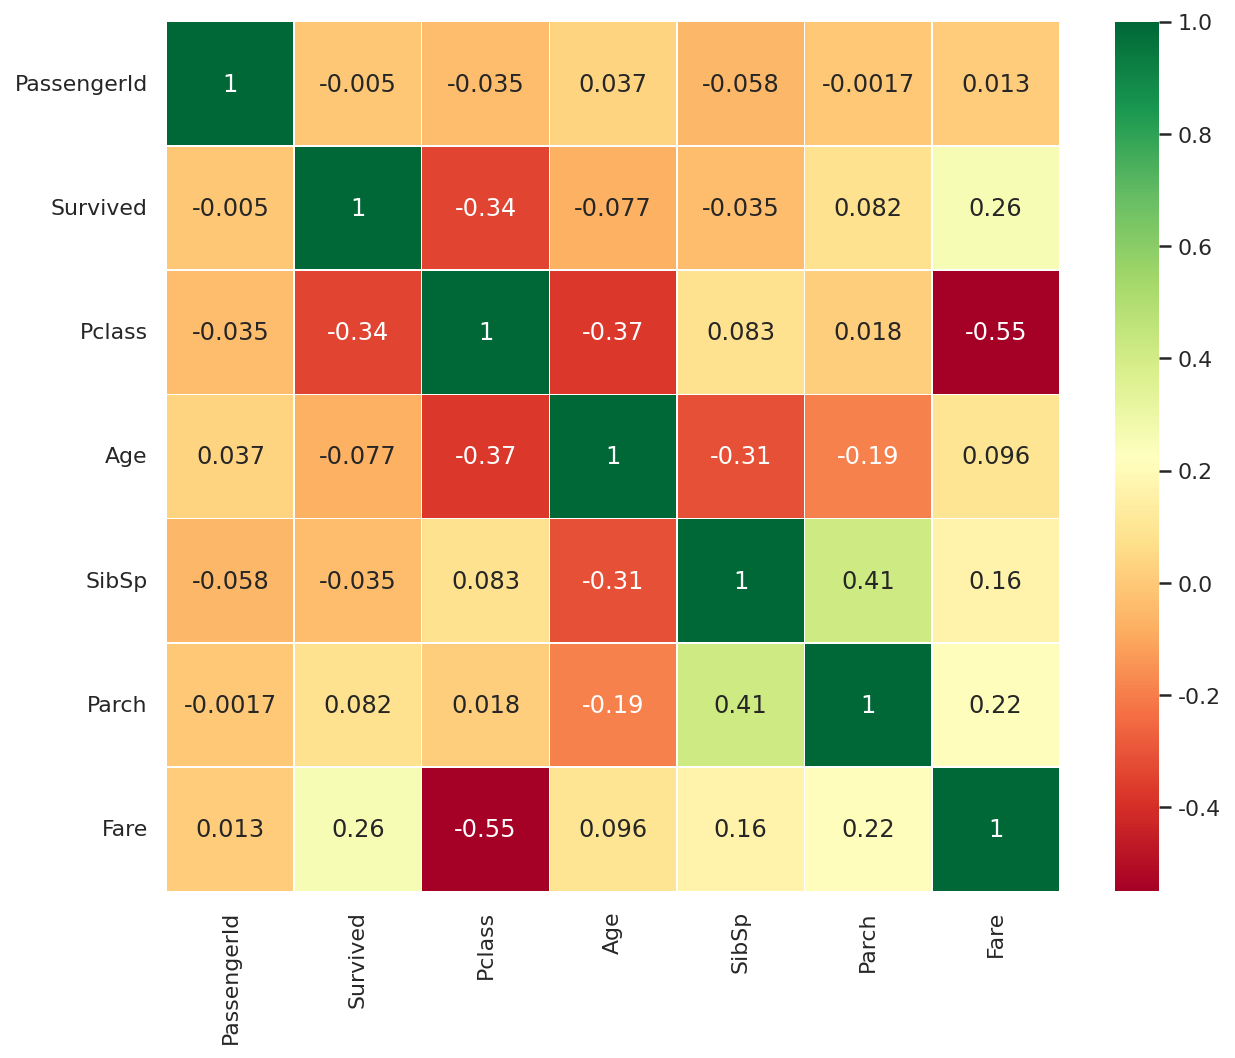

In [ ]:
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- Age 컬럼과 Pclass 컬럼의 상관관계가 높다
- Pclass 컬럼과 Survived 컬럼의 상관관계가 높다
- Pclass 컬럼과 Fare 컬럼의 상관관계가 높다

In [116]:
# 데이터 미리 보기
df_train.head()

# 두 변수의 관계에서 설명을 하는 변수 : 설명변수(explanatory variable)
# 이에 반응하는 변수를 : 반응변수(response variable)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  ...  Parch  \
0                            Braund, Mr. Owen Harris    male  ...      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0   
2                             Heikkinen, Miss. Laina  female  ...      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0   
4                           Allen, Mr. William Henry    male  ...      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         S  
1          PC 17599  71.2833   C85         C  
2  STON/O2. 3101282   7.9250   NaN         S  
3            113803  53.1000  C123         S  
4            373450   8.0500   NaN         S  

[5 rows x 12 columns]

In [117]:
df_train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex  ...  Parch      Ticket   Fare Cabin  Embarked  
886    male  ...      0      211536  13.00   NaN         S  
887  female  ...      0      112053  30.00   B42         S  
888  female  ...      2  W./C. 6607  23.45   NaN         S  
889    male  ...      0      111369  30.00  C148         C  
890    male  ...      0      370376   7.75   NaN         Q  

[5 rows x 12 columns]

###3.1.2 pd.DataFrame.shape
- 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [ ]:
df_train.shape

(891, 14)

### 3.1.3 pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수
- 기술통계량이란?
  - 해당 column을 대표할 수 있는 통계값들을 의미
- 기술통계량 종류
  - count: 해당 column에서 비어 있지 않은 값의 개수
  - mean: 평균
  - std: 표준편차
  - min: 최솟값 (이상치 포함)
  - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
  - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
  - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
  - max: 최댓값 (이상치 포함)
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
  - 아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
  - 위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
  - IQRIQR = Q_3 - Q_1Q3​−Q1​


  <img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png"  alt="img" width="400" height="400"/>

In [ ]:
df_train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

+ 훈련 자료 샘플 수 : 891 (count=891)
+ 훈련 자료 샘플 내 생존율 : 38.4% (mean의 Survived=0.383838)

In [ ]:
titanic3_df.describe()

pclass     survived  ...         fare        body
count  1309.000000  1309.000000  ...  1308.000000  121.000000
mean      2.294882     0.381971  ...    33.295479  160.809917
std       0.837836     0.486055  ...    51.758668   97.696922
min       1.000000     0.000000  ...     0.000000    1.000000
25%       2.000000     0.000000  ...     7.895800   72.000000
50%       3.000000     0.000000  ...    14.454200  155.000000
75%       3.000000     1.000000  ...    31.275000  256.000000
max       3.000000     1.000000  ...   512.329200  328.000000

[8 rows x 7 columns]

- 수치형 자료 : 양적 자료 ex) 키,몸무게,성적
  - 연속형 자료 : 키, 몸무게 (연속적 자료)
  - 이산형 자료 : 자동차 건수 (셀 수 있는 자료)
- 번주형 자료 : 질적 자료 ex) 성별, 선호도, 혈액형
  - 순위형 자료 : 선호도 (순서)
  - 명목형 자료 : 혈액형 (순서 의미 없음)

In [ ]:
# 훈련 자료 object 변수 통계치
# train_df.describe(include=['O']) #-> 범주형 데이터
df_train.describe(include=['object'])
# train_df.describe(include=['number'])
# train_df.describe(include="all") # 입력의 모든 열

Name   Sex    Ticket    Cabin Embarked
count                      891   891       891      204      889
unique                     891     2       681      147        3
top     Long, Mr. Milton Clyde  male  CA. 2343  B96 B98        S
freq                         1   577         7        4      644

###3.1.4 pd.Series.value_counts()
- series 내 고유값들 각각의 개수를 보여줌
- 가장 많이 나오는 고유값들 순서로 보여줌
- 비어 있는 값은 고려하지 않음

In [ ]:
df_train.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
890          1         1       Behr, Mr. Karl Howell                                 male    26.0  0      0      111369    30.0000   C148   C           1
337          0         1       Pears, Mr. Thomas Clinton                             male    29.0  1      0      113776    66.6000   C2     S           1
332          0         1       Partner, Mr. Austen                                   male    45.5  0      0      113043    28.5000   C124   S           1
330          1         1       Hippach, Miss. Jean Gertrude                          female  16.0  0      1      111361    57.9792   B18    C           1
328          1         2       Ball, Mrs. (Ada E Hall)                               female  36.0  0      0      28551     13.0000   D      S           1
                                                                                 

In [ ]:
df_train.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>

## **3.2 Missing Values**
As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column in both training and test set.
* Training set have missing values in `Age`, `Cabin` and `Embarked` columns
* Test set have missing values in `Age`, `Cabin` and `Fare` columns

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in `Age`, `Embarked` and `Fare` are smaller compared to total sample, but roughly **80%** of the `Cabin` is missing. Missing values in `Age`, `Embarked` and `Fare` can be filled with descriptive statistical measures but that wouldn't work for `Cabin`.

In [190]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




##### Data Cleansing & Pre-Processing 데이터 전처리

### **3.2.1 Age**
- 승객의 연령에 대한 결측값 처리 방안
- 전체 연령의 평균을 사용하는 방식이 아닌, 1) 상관관계 분석  2) 상관성이 가장 높은 변수 기준의 중앙값 사용

Missing values in `Age` are filled with median age, but using median age of the whole data set is not a good choice. Median age of `Pclass` groups is the best choice because of its high correlation with `Age` **(0.408106)** and `Survived` **(0.338481)**. It is also more logical to group ages by **passenger classes** instead of other features.

In [191]:
# 상관계수
df_all.corr()

Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.221539     0.031428 -0.558629  0.160238   
Parch       -0.150917  0.221539  1.000000     0.008942  0.018322  0.373587   
PassengerId  0.028814  0.031428  0.008942     1.000000 -0.038354 -0.055224   
Pclass      -0.408106 -0.558629  0.018322    -0.038354  1.000000  0.060832   
SibSp       -0.243699  0.160238  0.373587    -0.055224  0.060832  1.000000   
Survived    -0.077221  0.257307  0.081629    -0.005007 -0.338481 -0.035322   

             Survived  
Age         -0.077221  
Fare         0.257307  
Parch        0.081629  
PassengerId -0.005007  
Pclass      -0.338481  
SibSp       -0.035322  
Survived     1.000000

In [192]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

Feature 1    Feature 2  Correlation Coefficient
0        Age          Age                 1.000000
9        Age       Pclass                 0.408106
18       Age        SibSp                 0.243699
21       Age         Fare                 0.178740
26       Age        Parch                 0.150917
30       Age     Survived                 0.077221
41       Age  PassengerId                 0.028814

In order to be more accurate, `Sex` feature is used as the second level of `groupby` while filling the missing `Age` values. As seen from below, `Pclass` and `Sex` groups have distinct median `Age` values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median `Age` than males. The median ages below are used for filling the missing values in `Age` feature.

In [193]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [124]:
df_all.Age.isnull().sum()

0

### 3.2.2 Name
- 승객 이름의 정보에서 Mr., Miss. 등의 정보를 정규표현식을 이용해서 추출

In [39]:
df_all['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [40]:
# \w : 알파벳과 _ (언더바)
# expend=Flase인 경우 label 단위, expend=True인 경우 column 단위
df_all['Name_fix'] = df_all['Name'].str.extract('( [A-Z]+\w*)', expand=False).str.strip()

In [41]:
df_all['Name_fix'].value_counts()

Mr            737
Miss          256
Mrs           191
Master         59
Rev             8
             ... 
Mulder          1
Pelsmaeker      1
Walle           1
Don             1
Ocana           1
Name: Name_fix, Length: 38, dtype: int64

- Mr. : 성인 남성 (503)
- Miss : 결혼을 하지 않은 여성 (179)
- Mrs. : 결혼을 한 여성 (121)
- Master (Mstr.) : 결혼을 하지 않은 남성. 주로 청소년 이하 (40)
- Dr : 의사 (7)

In [42]:
df_all['Name_fix'] = np.where(df_all['Name_fix'].isin(['Mr','Miss','Mrs','Master','Dr']), df_all['Name_fix'], 'Others')
df_all['Name_fix'].value_counts()

Mr        737
Miss      256
Mrs       191
Master     59
Others     58
Dr          8
Name: Name_fix, dtype: int64

In [44]:
df_all.groupby(['Name_fix'])['Survived'].mean().sort_values(ascending=False)

Name_fix
Mrs       0.801653
Miss      0.703911
Master    0.575000
Dr        0.428571
Others    0.341463
Mr        0.157058
Name: Survived, dtype: float64

In [45]:
df_all.groupby('Name_fix')['Age'].mean()

Name_fix
Dr        43.571429
Master     5.366923
Miss      21.784417
Mr        32.333925
Mrs       37.231707
Others    34.703704
Name: Age, dtype: float64

- 해당 이름별로 나이의 평균
- 위 평균값을 이용하여 Age에 Null인 데이터에 평균값을 넣어준다.

In [ ]:
for ls_df in [df_train]:
    ls_df['Age'] = ls_df['Age'].astype(float)
    ls_df['Age_median'] = ls_df.groupby(['Name_fix'])['Age'].transform('median')
    ls_df['Age'] = np.where(ls_df['Age'].isnull(), ls_df['Age_median'], ls_df['Age'])


In [122]:
df_train.Age.isnull().sum()

177

In [46]:
for ls_df in [df_all]:
    ls_df['Age'] = ls_df['Age'].astype(float)
    ls_df['Age_median'] = ls_df.groupby(['Name_fix'])['Age'].transform('median')
    ls_df['Age'] = np.where(ls_df['Age'].isnull(), ls_df['Age_median'], ls_df['Age'])

In [47]:
df_all.Age.isnull().sum()

0

- 여성,아이의 생존률이 Mr(남성)의 생존률 보다 높다

<Figure size 504x432 with 0 Axes>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


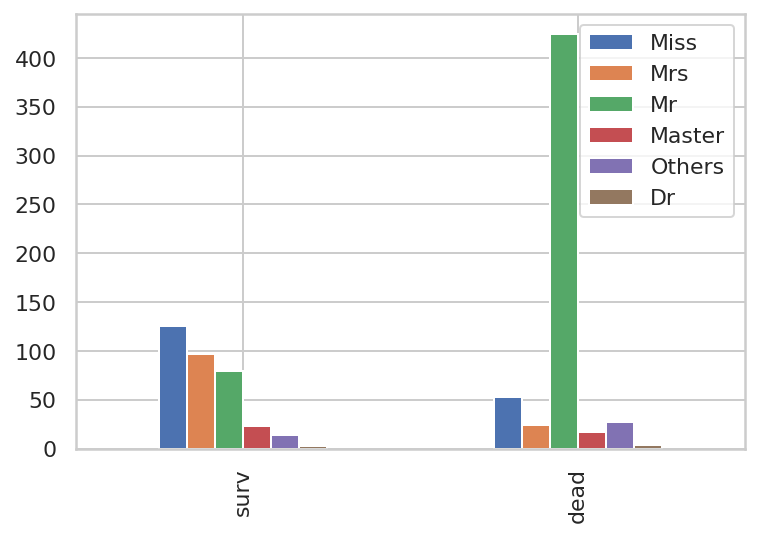

In [36]:
def bar_df(df,colname):
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index=['surv','dead'])
    return tt

plt.figure(figsize=(7,6))
bar_df(df_train,'Name_fix').plot(kind='bar')
plt.show()

### **3.2.3 Embarked**
- `Embarked` 카테고리 변수, 2개의 값이 누락됨
- 해당 2명은 여성, 1등급, 80달러 티켓 보유, 하인과 주인이 같이 승선, PClass가 가장 많은 C(Cherbourg)로 추정함
- 최종은 구글에서 해당 Name으로 검색하여 S

is a categorical feature and there are only **2** missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. The mode `Embarked` value for an upper class female passenger is **C (Cherbourg)**, but this doesn't necessarily mean that they embarked from that port.

In [194]:
df_all.describe(include='O')

Cabin Embarked                  Name   Sex    Ticket
count           295     1307                  1309  1309      1309
unique          186        3                  1307     2       929
top     C23 C25 C27        S  Connolly, Miss. Kate  male  CA. 2343
freq              6      914                     2   843        11

In [195]:
df_all[  (df_all['Pclass'] == 1 ) &(df_all['Sex'] == 'female' ) ]['Embarked'].value_counts()

C    71
S    69
Q     2
Name: Embarked, dtype: int64

In [196]:
df_all[ (df_all['Embarked'] == 'S' ) ]['Pclass'].value_counts()

3    495
2    242
1    177
Name: Pclass, dtype: int64

In [197]:
df_all[df_all['Embarked'].isnull()]

Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     ...  Pclass     Sex  SibSp Survived  Ticket  
61   ...       1  female      0      1.0  113572  
829  ...       1  female      0      1.0  113572  

[2 rows x 12 columns]

In [198]:
df_all[df_all['Name'].str.contains('Icard')]

Age Cabin Embarked  Fare                 Name  ...  Pclass     Sex  \
61  38.0   B28      NaN  80.0  Icard, Miss. Amelie  ...       1  female   

    SibSp Survived  Ticket  
61      0      1.0  113572  

[1 rows x 12 columns]

When I googled **Stone, Mrs. George Nelson (Martha Evelyn)**, I found that she embarked from **S (Southampton)** with her maid **Amelie Icard**, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

Missing values in `Embarked` are filled with **S** with this information.

In [199]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [200]:
df_all.Embarked.isnull().sum()

0

### **3.2.4 Fare**
There is only one passenger with missing `Fare` value. We can assume that `Fare` is related to family size (`Parch` and `SibSp`) and `Pclass` features. Median `Fare` value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [201]:
df_all[df_all['Fare'].isnull()]

Age Cabin Embarked  Fare                Name  ...  Pclass   Sex  SibSp  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas  ...       3  male      0   

     Survived  Ticket  
1043      NaN    3701  

[1 rows x 12 columns]

In [202]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [203]:
med_fare

7.8542

In [135]:
df_all.Fare.isnull().sum()

0

### **3.2.5 Cabin**
`Cabin` feature is little bit tricky and it needs further exploration. The large portion of the `Cabin` feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the `Cabin` values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)
* On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
* **A**, **B** and **C** decks were only for 1st class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers
* From going **A** to **G**, distance to the staircase increases which might be a factor of survival

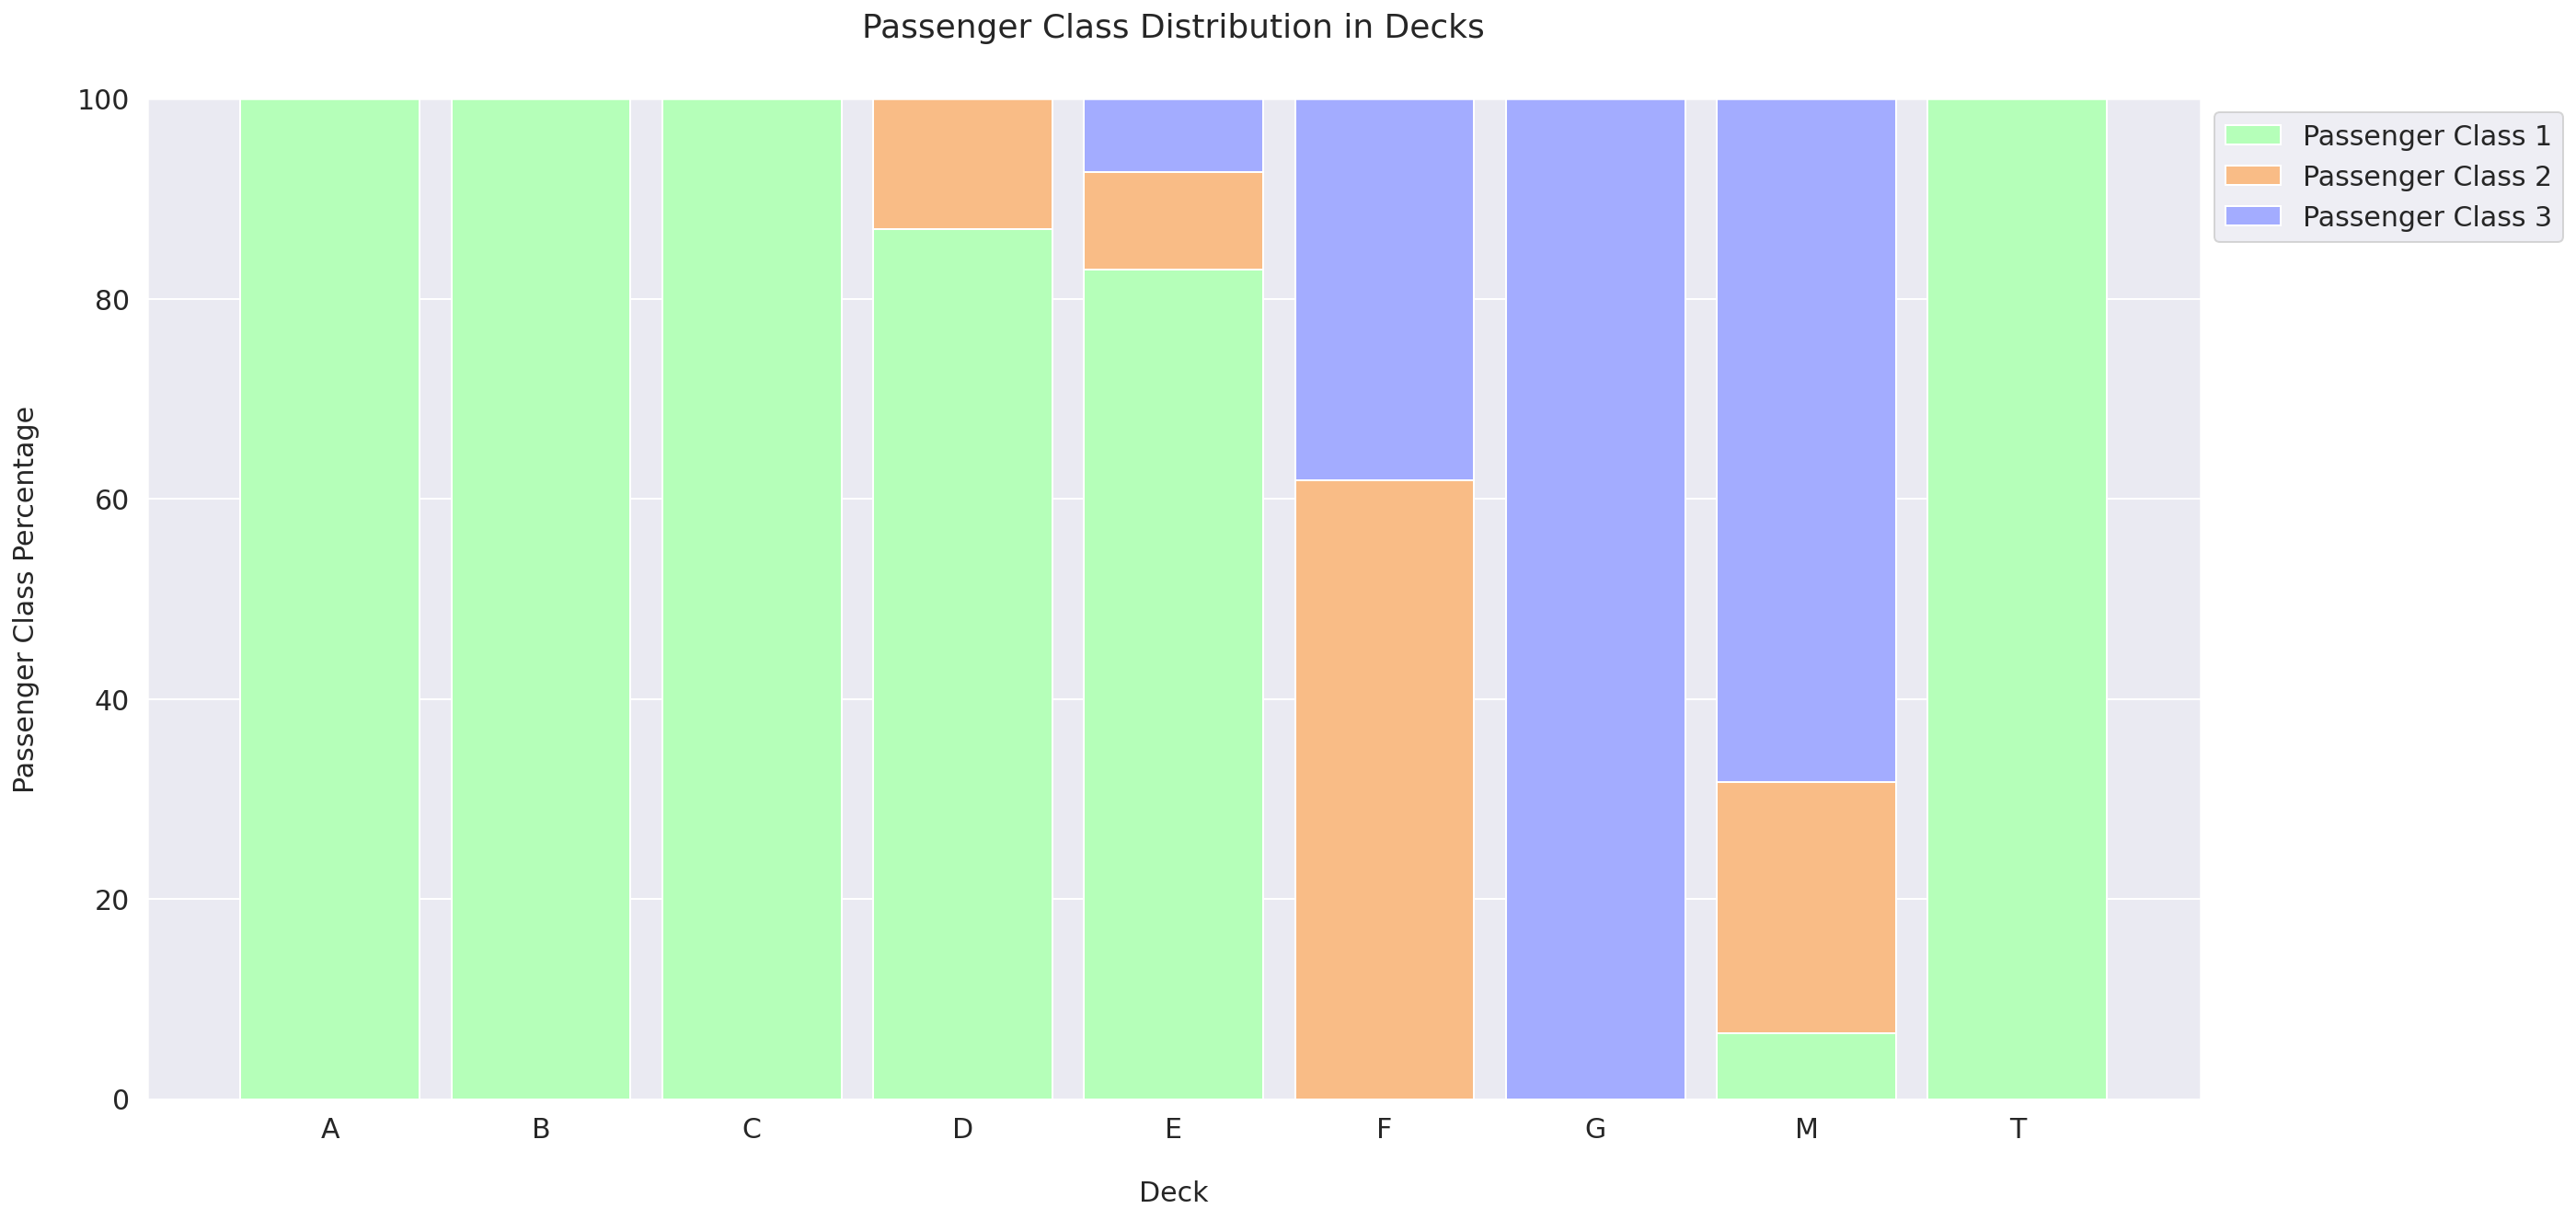

In [204]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

* **100%** of **A**, **B** and **C** decks are 1st class passengers
* Deck **D** has **87%** 1st class and **13%** 2nd class passengers
* Deck **E** has **83%** 1st class, **10%** 2nd class and **7%** 3rd class passengers
* Deck **F** has **62%** 2nd class and **38%** 3rd class passengers
* **100%** of **G** deck are 3rd class passengers
* There is one person on the boat deck in **T** cabin and he is a 1st class passenger. **T** cabin passenger has the closest resemblance to **A** deck passengers so he is grouped with **A** deck
* Passengers labeled as **M** are the missing values in `Cabin` feature. I don't think it is possible to find those passengers' real `Deck` so I decided to use **M** like a deck

In [205]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [206]:
df_all.sample(3)

Age Cabin Embarked     Fare                         Name  ...     Sex  \
873   47.0   NaN        S   9.0000  Vander Cruyssen, Mr. Victor  ...    male   
499   24.0   NaN        S   7.7958           Svensson, Mr. Olof  ...    male   
1003  36.0   A29        C  31.6792     Evans, Miss. Edith Corse  ...  female   

      SibSp  Survived    Ticket  Deck  
873       0       0.0    345765     M  
499       0       0.0    350035     M  
1003      0       NaN  PC 17531     A  

[3 rows x 13 columns]

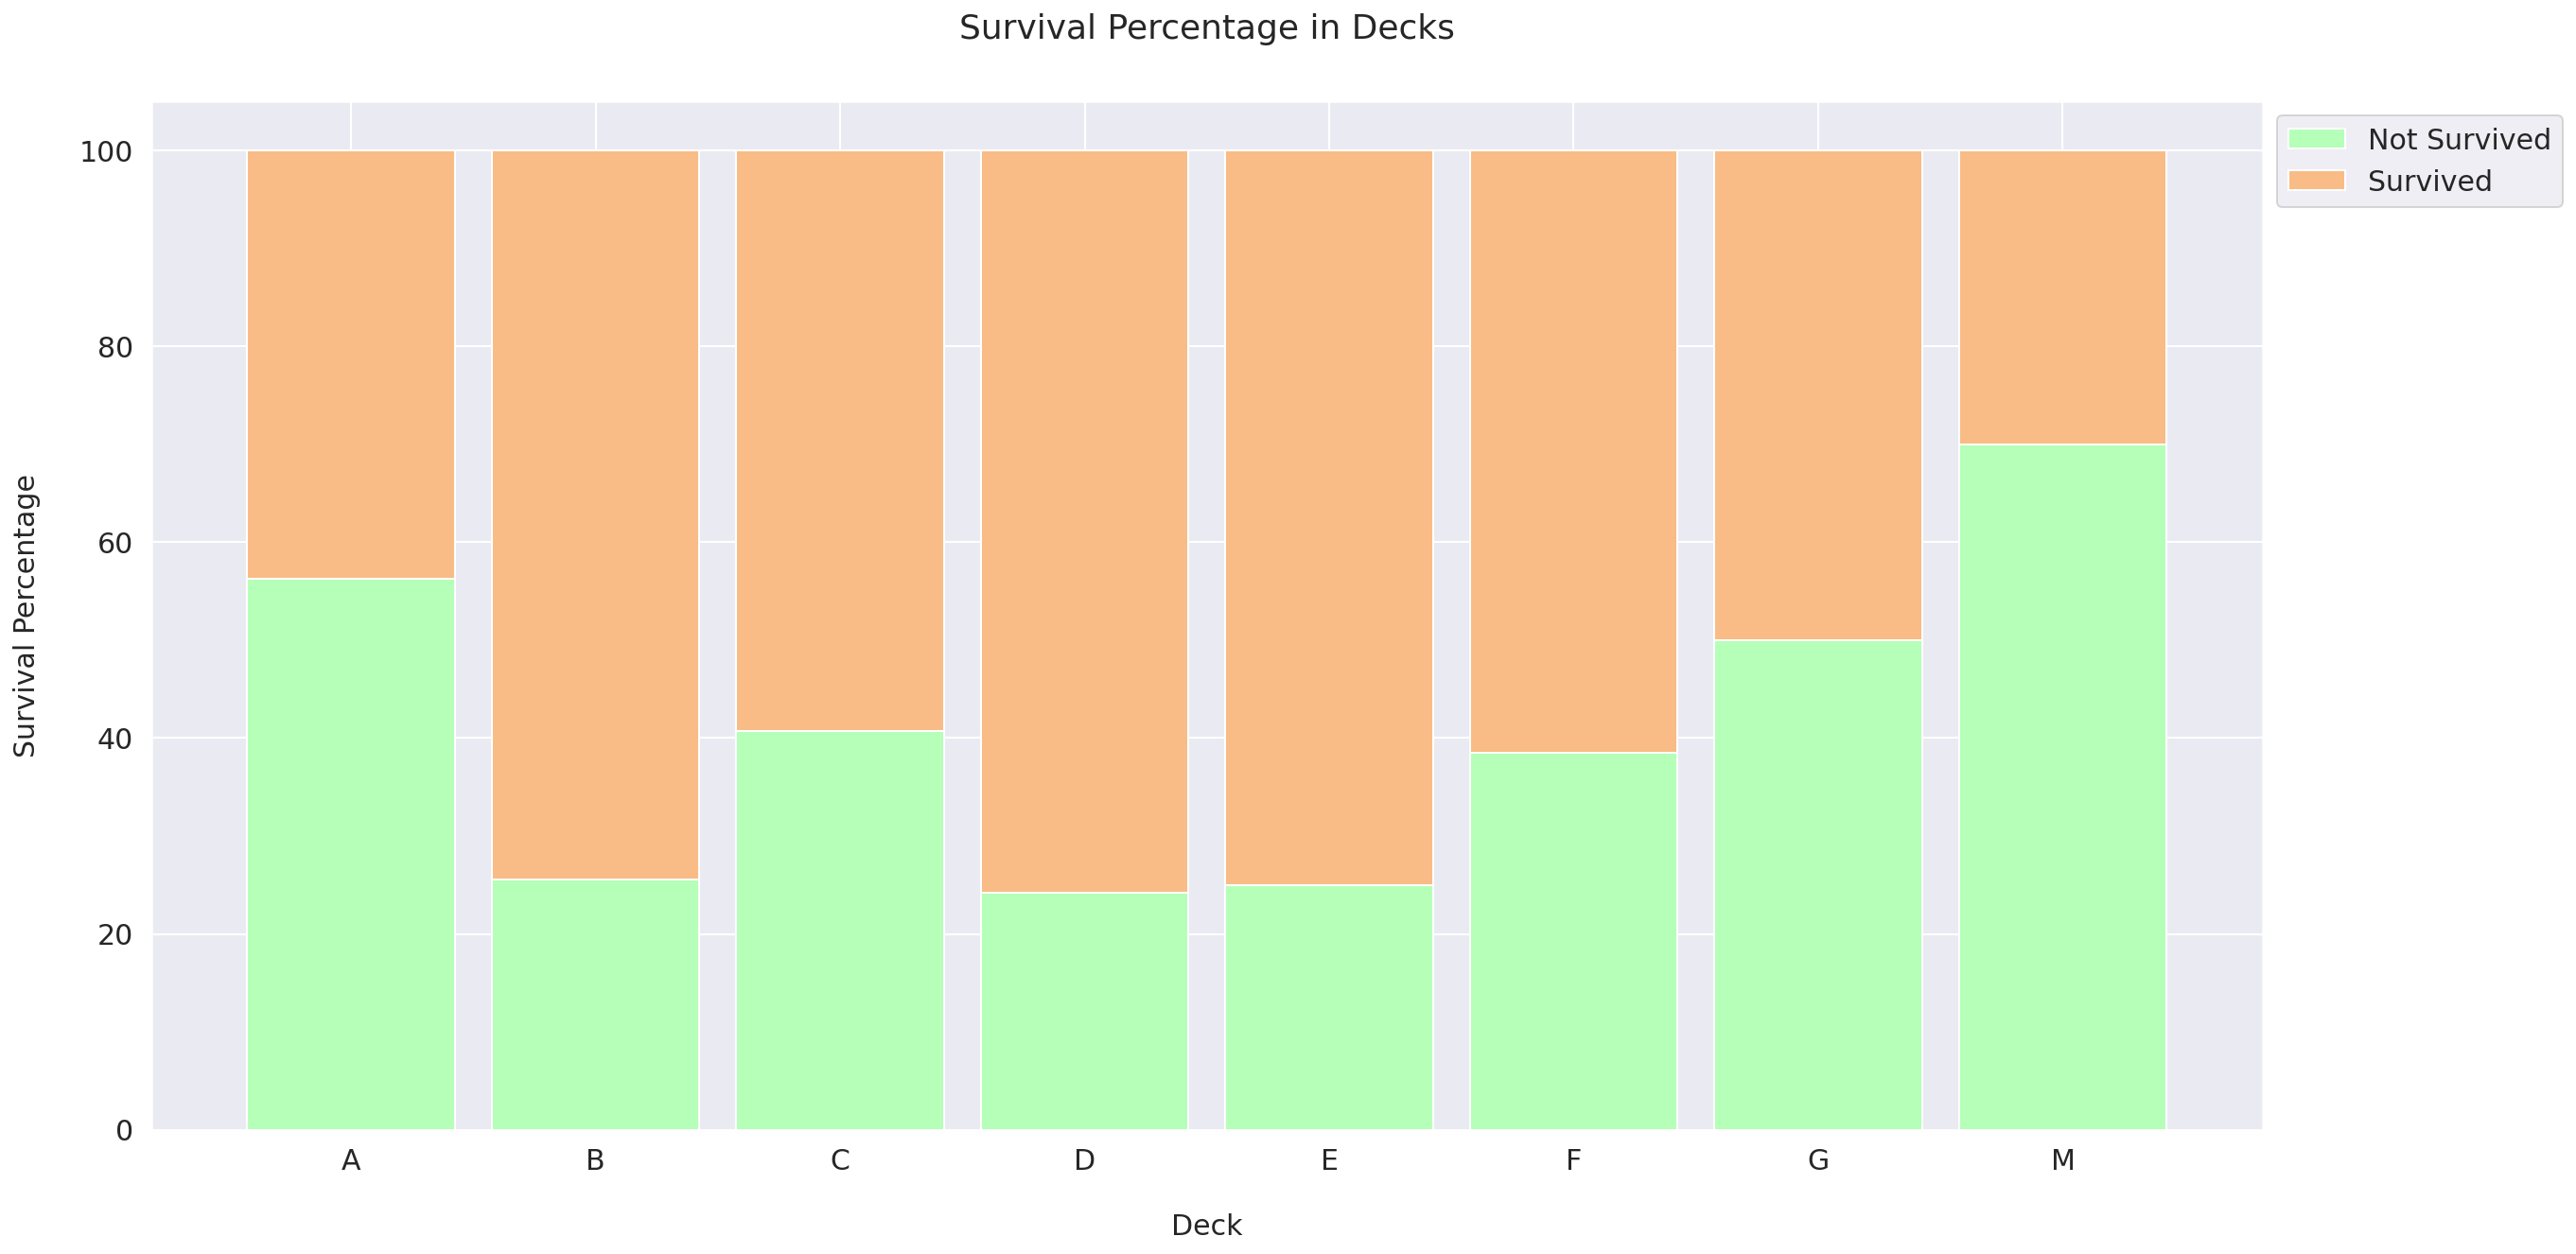

In [207]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

As I suspected, every deck has different survival rates and that information can't be discarded. Deck **B**, **C**, **D** and **E** have the highest survival rates. Those decks are mostly occupied by 1st class passengers. **M** has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers. To conclude, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. In my opinion **M** (Missing `Cabin` values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as **M** is a reasonable way to handle the missing data. It is a unique group with shared characteristics. `Deck` feature has high-cardinality right now so some of the values are grouped with each other based on their similarities.
* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
* **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
* **F** and **G** decks are labeled as **FG** because of the same reason above
* **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [208]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [209]:
df_all.Deck.isnull().sum()

0

After filling the missing values in `Age`, `Embarked`, `Fare` and `Deck` features, there is no missing value left in both training and test set. `Cabin` is dropped because `Deck` feature is used instead of it.

In [210]:
# Dropping the Cabin feature
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




## **3.3 Target Distribution**
* **38.38%** (342/891) of training set is **Class 1**
* **61.62%** (549/891) of training set is **Class 0**

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


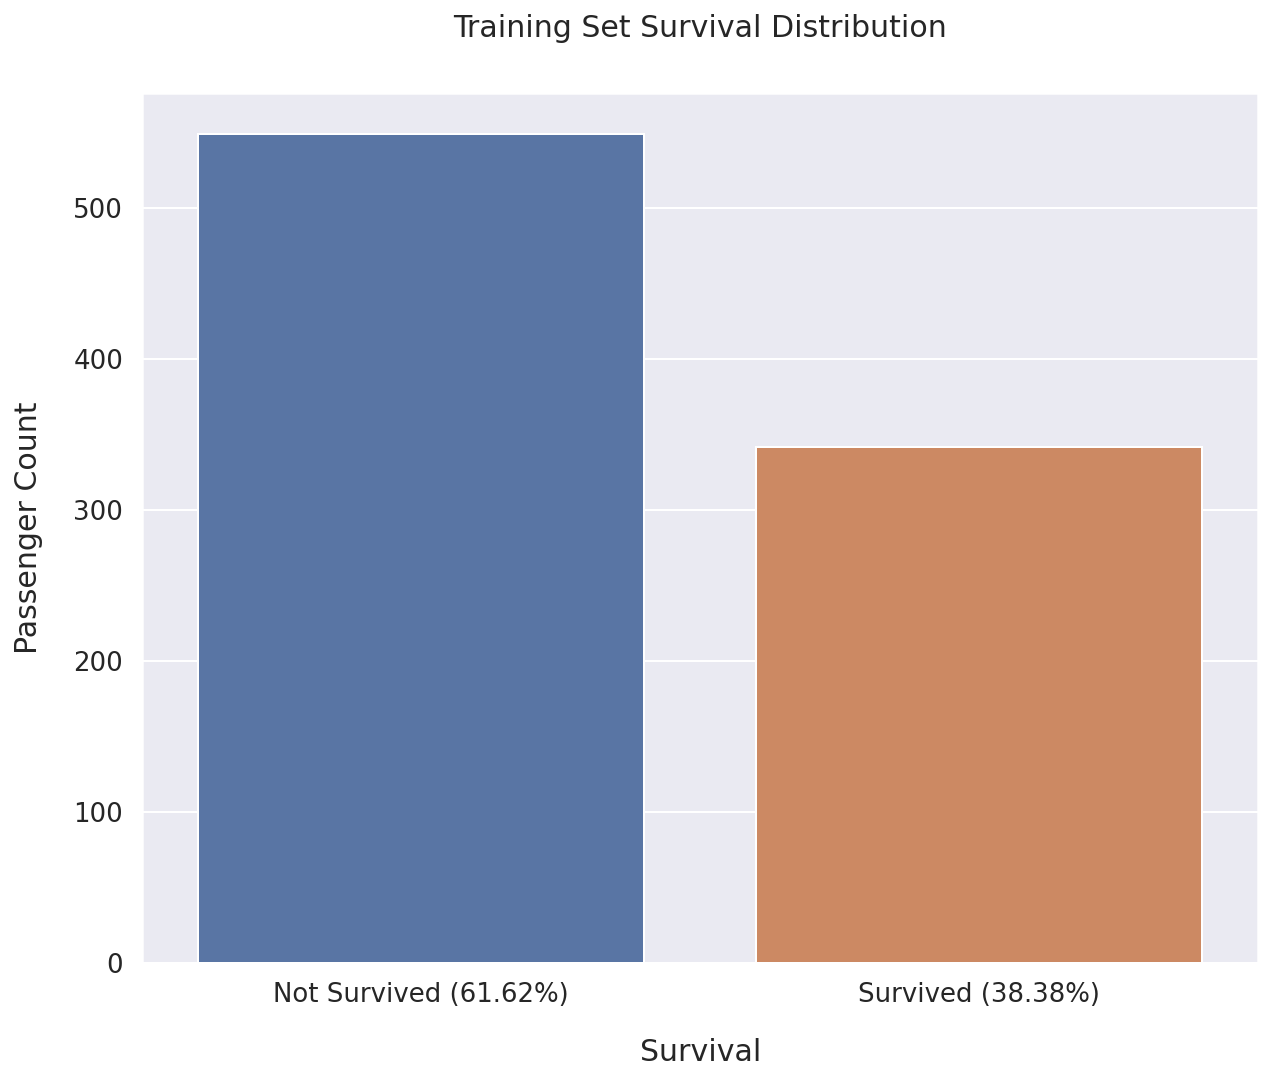

In [211]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

## **3.4 Correlations**
Features are highly correlated with each other and dependent to each other. The highest correlation between features is **0.549500** in training set and **0.577147** in test set (between `Fare` and `Pclass`). The other features are also highly correlated. There are **9** correlations in training set and **6** correlations in test set that are higher than **0.1**.

In [212]:
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [213]:
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

Feature 1 Feature 2  Correlation Coefficient
6       Fare    Pclass                 0.549500
8        Age    Pclass                 0.417667
10     Parch     SibSp                 0.414838
12    Pclass  Survived                 0.338481
14      Fare  Survived                 0.257307
16       Age     SibSp                 0.249747
18     Parch      Fare                 0.216225
20     Parch       Age                 0.176733
22     SibSp      Fare                 0.159651
24       Age      Fare                 0.124061

In [214]:
# Test set high correlations
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

Feature 1 Feature 2  Correlation Coefficient
6     Pclass      Fare                 0.577489
8        Age    Pclass                 0.526789
10       Age      Fare                 0.345347
12     SibSp     Parch                 0.306895
14     Parch      Fare                 0.230410
16      Fare     SibSp                 0.172032

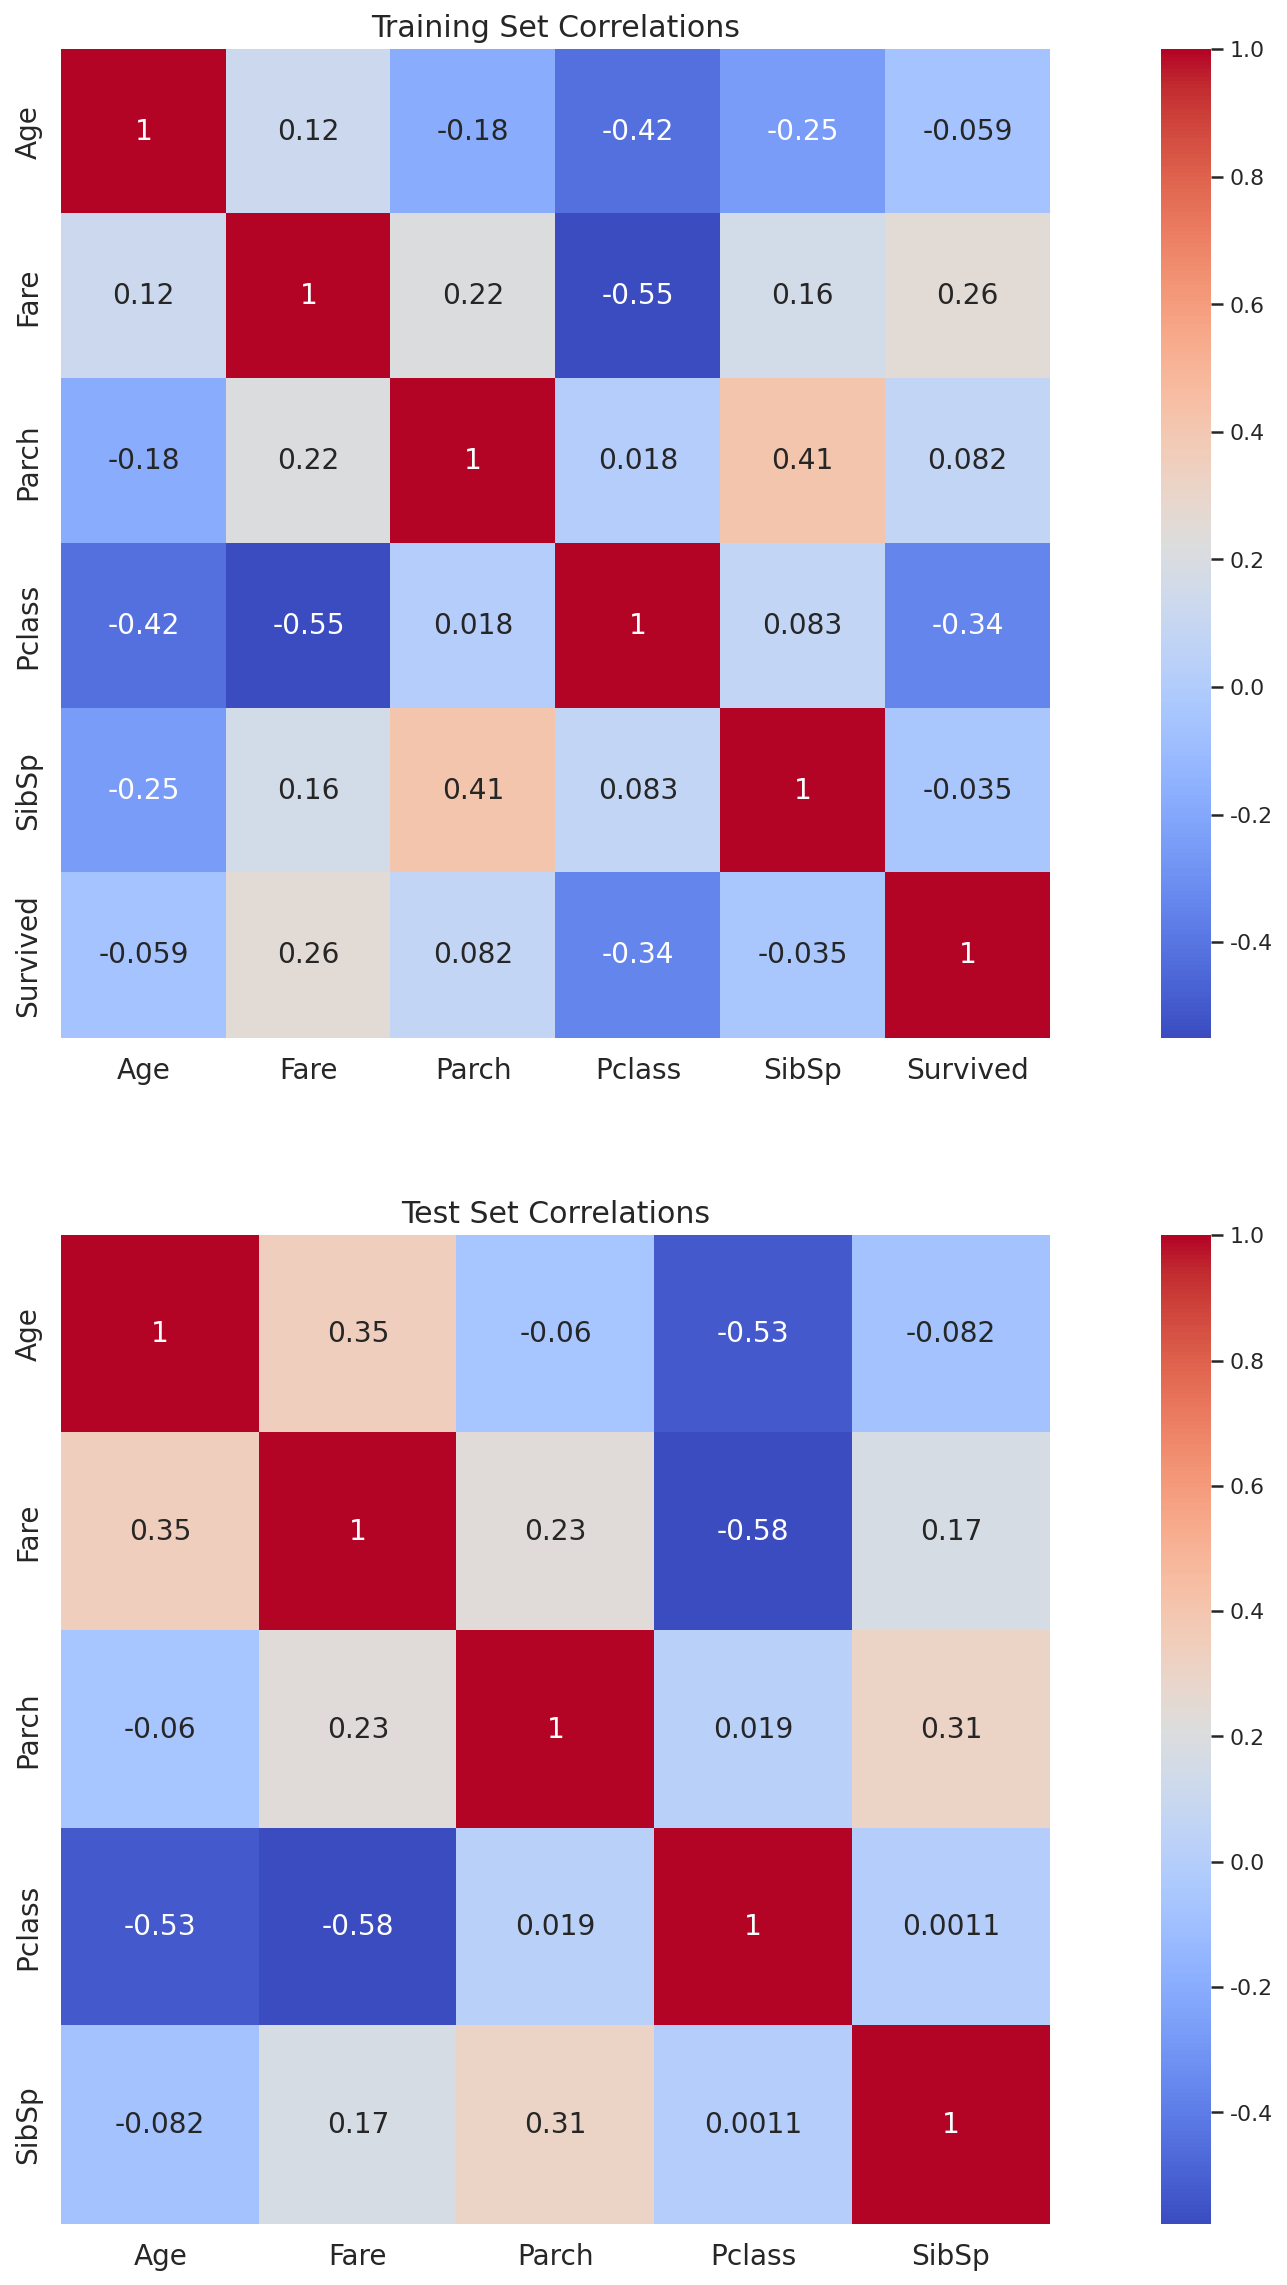

In [215]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

## **3.5 Target Distribution in Features**

### **3.5.1 Continuous Features**
Both of the continuous features (`Age` and `Fare`) have good split points and spikes for a decision tree to learn. One potential problem for both features is, the distribution has more spikes and bumps in training set, but it is smoother in test set. Model may not be able to generalize to test set because of this reason.

* Distribution of `Age` feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
* In distribution of `Fare` feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

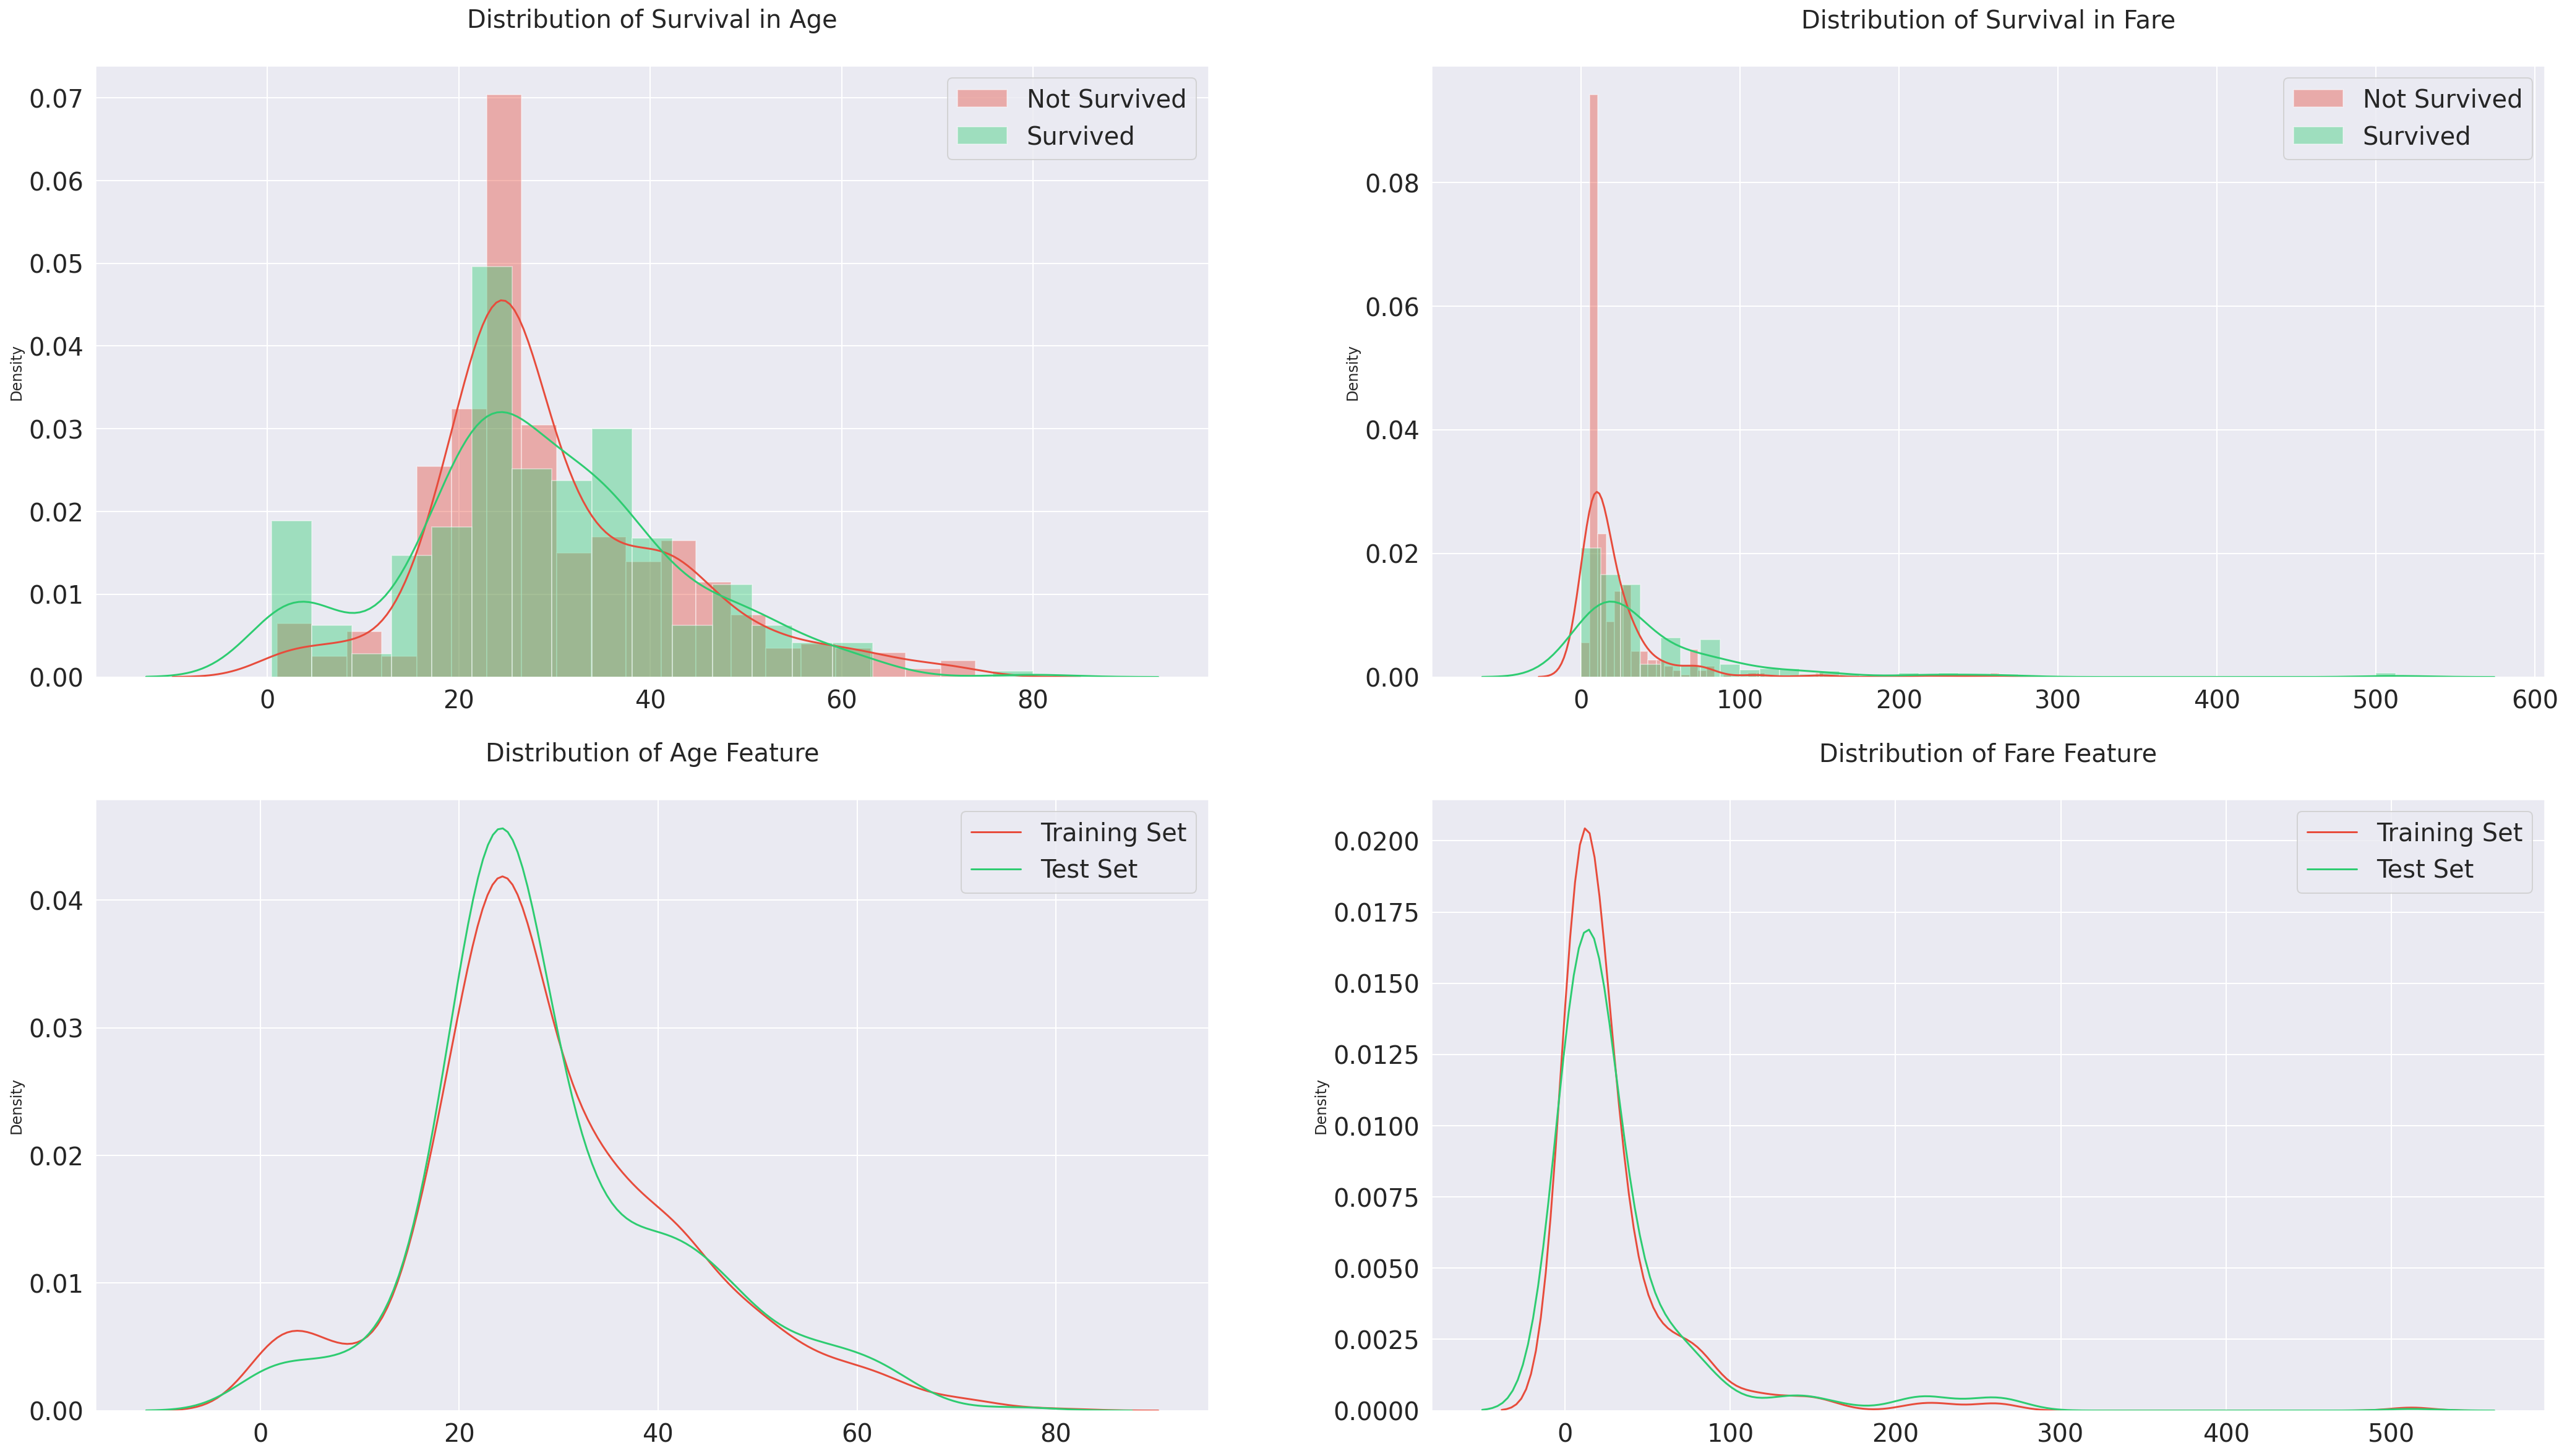

In [216]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(df_train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

### **3.5.2 Categorical Features**
Every categorical feature has at least one class with high mortality rate. Those classes are very helpful to predict whether the passenger is a survivor or victim. Best categorical features are `Pclass` and `Sex` because they have the most homogenous distributions.

* Passengers boarded from **Southampton** has a lower survival rate unlike other ports. More than half of the passengers boarded from **Cherbourg** had survived. This observation could be related to `Pclass` feature
* `Parch` and `SibSp` features show that passengers with only one family member has a higher survival rate

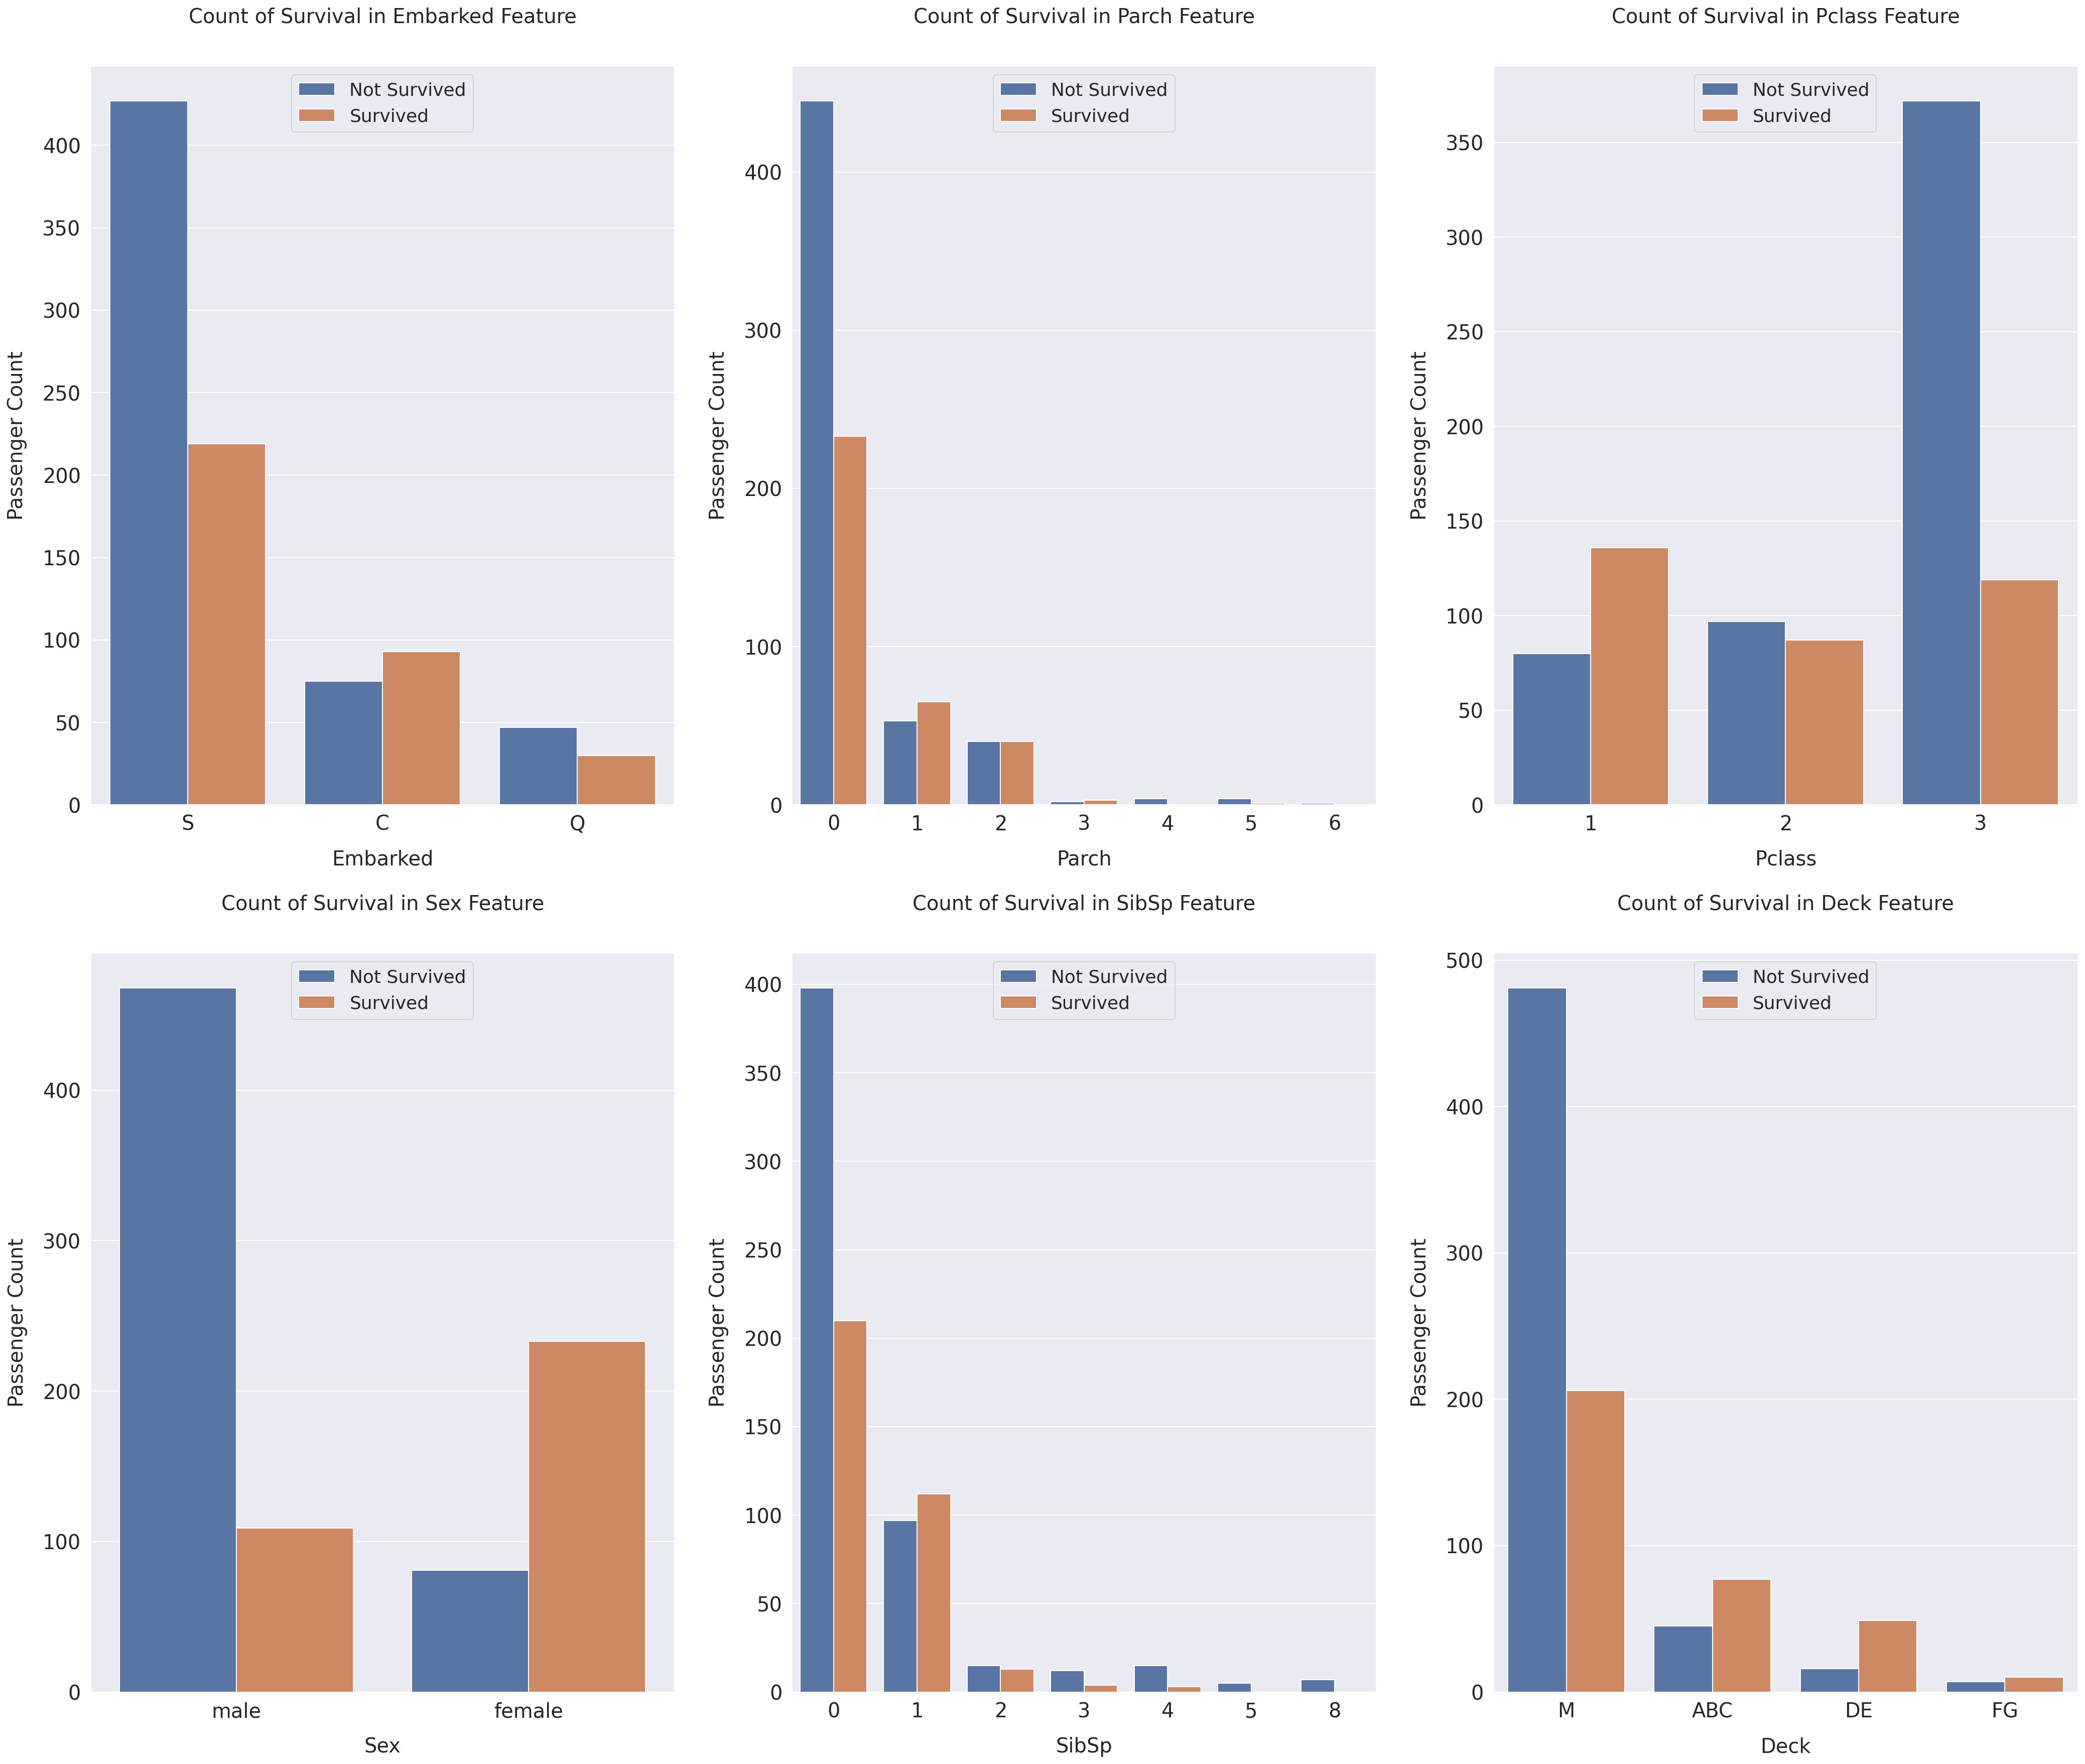

In [217]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

## **3.6 Conclusion**
Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. Target encoding could be very useful as well because of the high correlations with `Survived` feature.

Split points and spikes are visible in continuous features. They can be captured easily with a decision tree model, but linear models may not be able to spot them.

Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined with each other to make new features.

Created a new feature called `Deck` and dropped `Cabin` feature at the **Exploratory Data Analysis** part.

In [218]:
df_all = concat_df(df_train, df_test)
df_all.head()

Age Deck Embarked     Fare  \
0  22.0    M        S   7.2500   
1  38.0  ABC        C  71.2833   
2  26.0    M        S   7.9250   
3  35.0  ABC        S  53.1000   
4  35.0    M        S   8.0500   

                                                Name  ...  Pclass     Sex  \
0                            Braund, Mr. Owen Harris  ...       3    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  ...       1  female   
2                             Heikkinen, Miss. Laina  ...       3  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...       1  female   
4                           Allen, Mr. William Henry  ...       3    male   

   SibSp Survived            Ticket  
0      1      0.0         A/5 21171  
1      1      1.0          PC 17599  
2      0      1.0  STON/O2. 3101282  
3      1      1.0            113803  
4      0      0.0            373450  

[5 rows x 12 columns]

---

### 이름(Name)별 객실(Pclass), 생존율

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


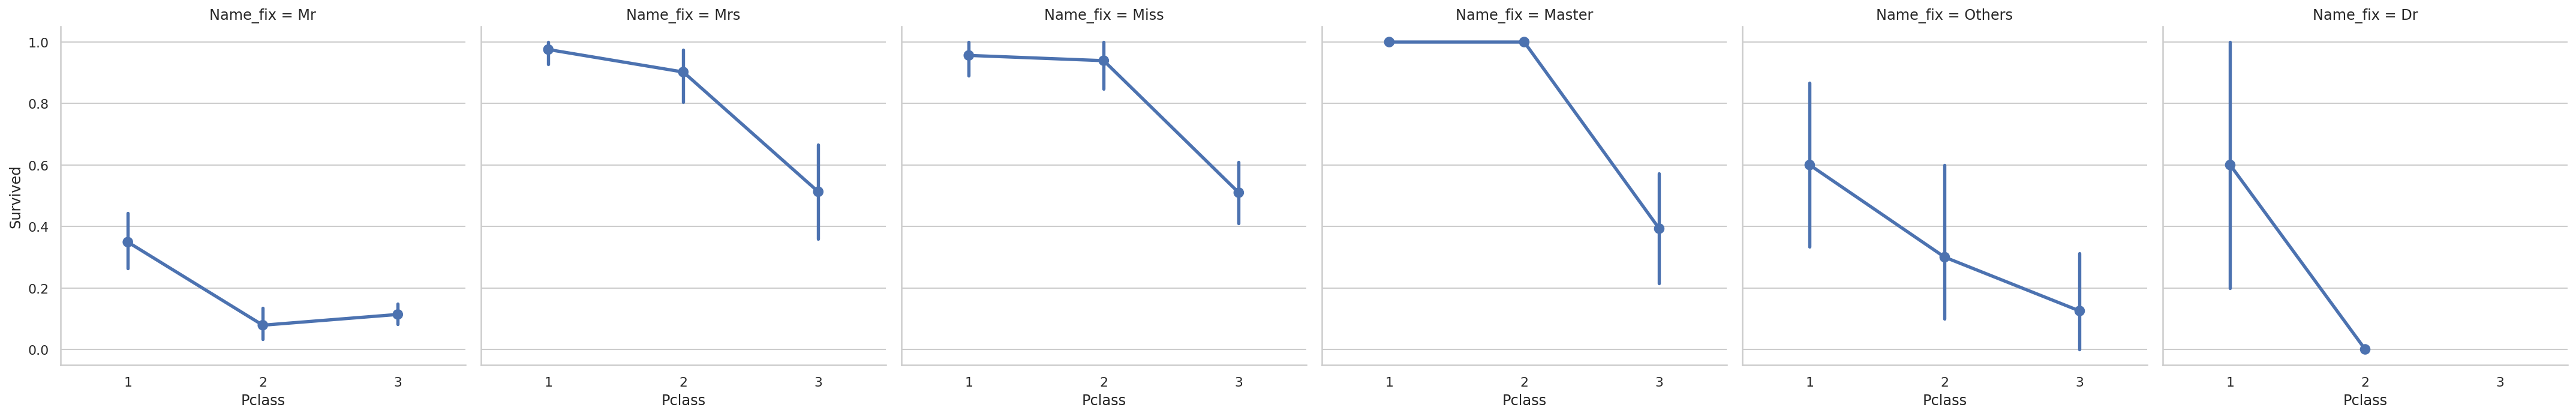

In [ ]:
sns.factorplot('Pclass','Survived',col='Name_fix',data=df_train)
plt.show()

---

### 객실 등급(Pclass)에 따른 생존율 비교

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

- 객실 등급이 좋을 수록 생존율이 높음

### 성별(Sex)에 따른 생존율 비교

In [ ]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
df_train.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

- 여성 : 생존자 233명 사망자 81명 = 314명
- 남성 : 생존자 109명, 사망자 468명 = 577명

In [ ]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

- 여성의 생존율이 남성보다 높음

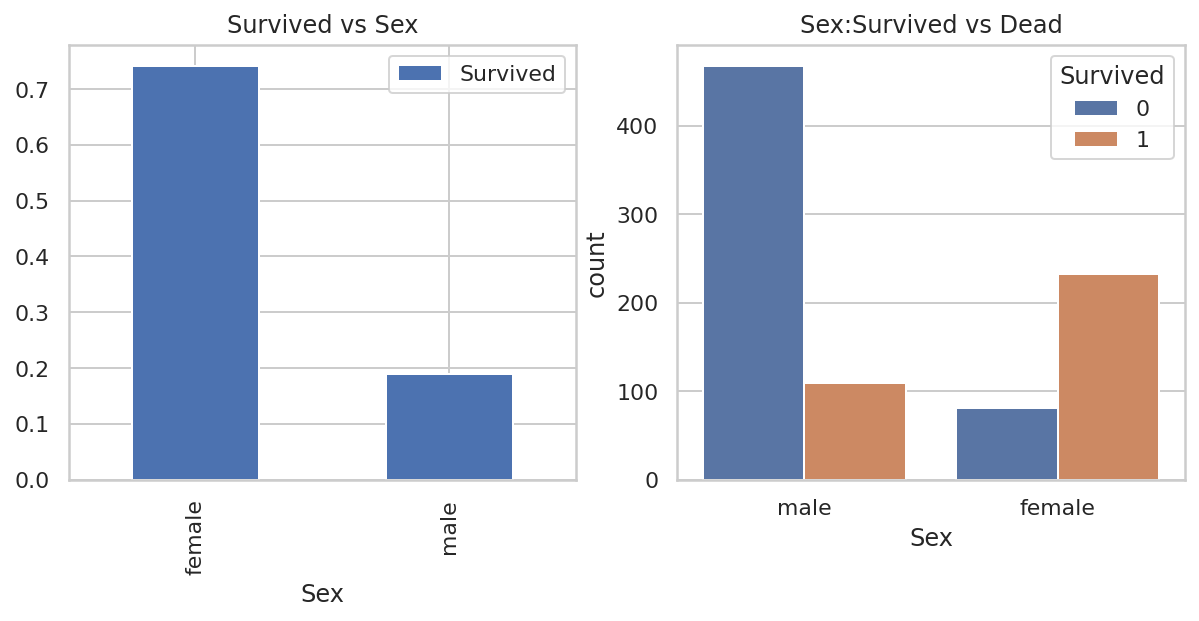

In [ ]:
#성별에 따른 생존율 bar graph
f, ax = plt.subplots(1, 2, figsize=(10, 4))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### 승선한 형제자매,배우자 수(SibSp)에 따른 생존율 비교

In [ ]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

- 형제자매와 배우자 수(SibSp)가 작을수록 생존확률이 높음

### 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

In [ ]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

- 식솔들 1,2,3명일 경우 생존률이 높다 
- 4,5,6명일 경우 생존률이 낮다

### 승선한 형제자매,배우자 수(SibSp) + 부모, 자식 수 (Parch)에 따른 생존율 비교

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


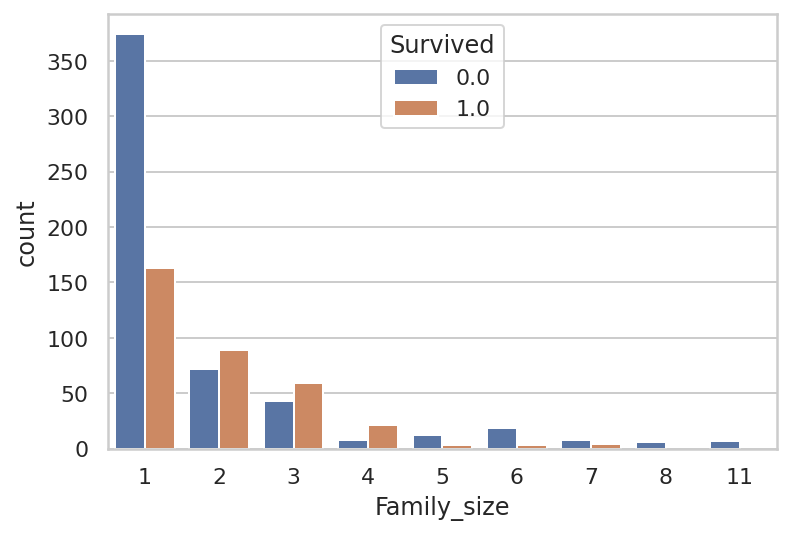

In [73]:
# 위 두 컬럼을 합하여 해당 승객이 속한 가족구성원의 총 수를 구하여 새로운 파생변수를 생성
df_train['Family_size']=df_train['SibSp'] + df_train['Parch'] + 1
sns.countplot(data = df_train, x='Family_size', hue='Survived')

- 가족이 없는 경우 사망률이 더 높다.
- 2-4 명의 가족이 있는 경우 생존률이 비교적 높다.

### 생존 여부(Survived)에 따른 연령(Age) 분포

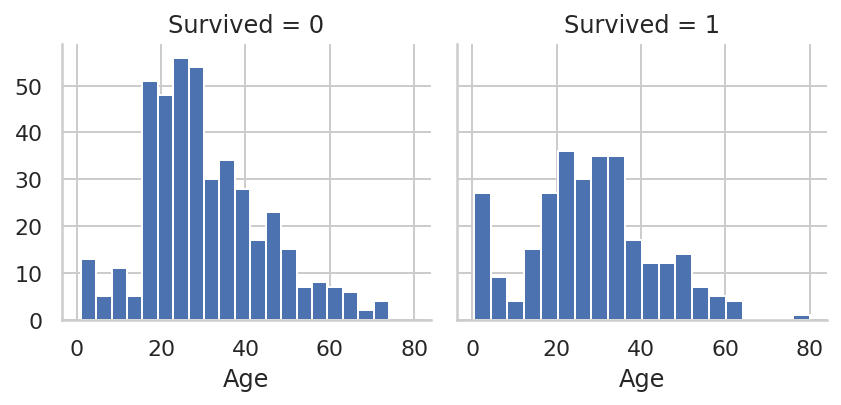

In [ ]:
# 열(col)을 생존 여부로 나눔
# FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는 것과 같다. 
g = sns.FacetGrid(df_train, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
# bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다.
g.map(plt.hist, 'Age', bins=20)
# 1이 생존

- 4세 이하의 유아의 생존율이 높음
- 15 ~ 25세 승객들의 생존율이 높음

### 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

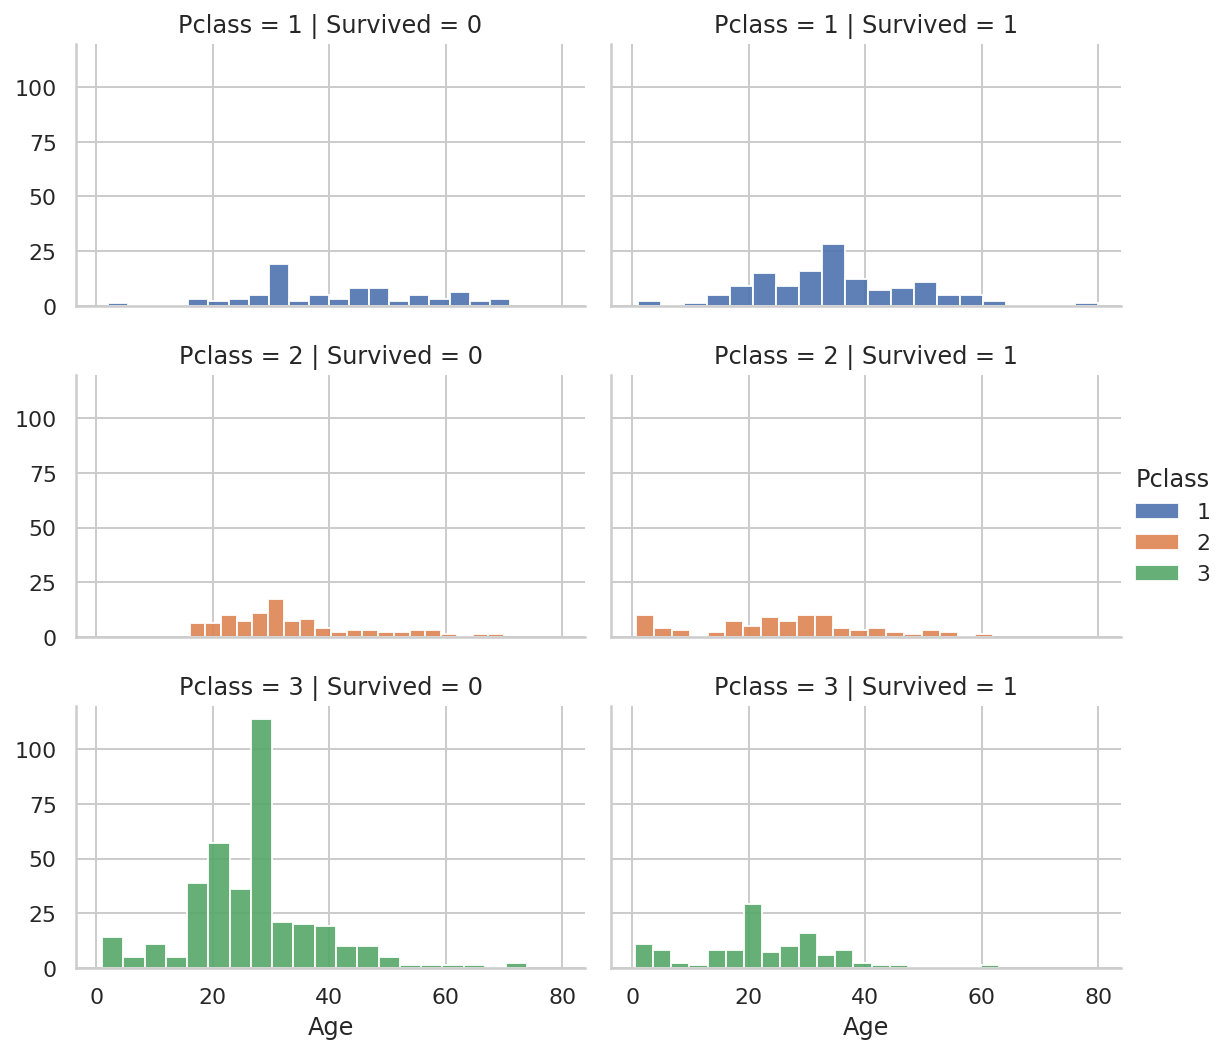

In [ ]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', hue="Pclass", height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.9, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

+ 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
+ 객실 등급이 2등급인 유아는 대부분 생존함
+ 객실 등급이 1등급인 경우 생존율이 비교적 높음

### 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

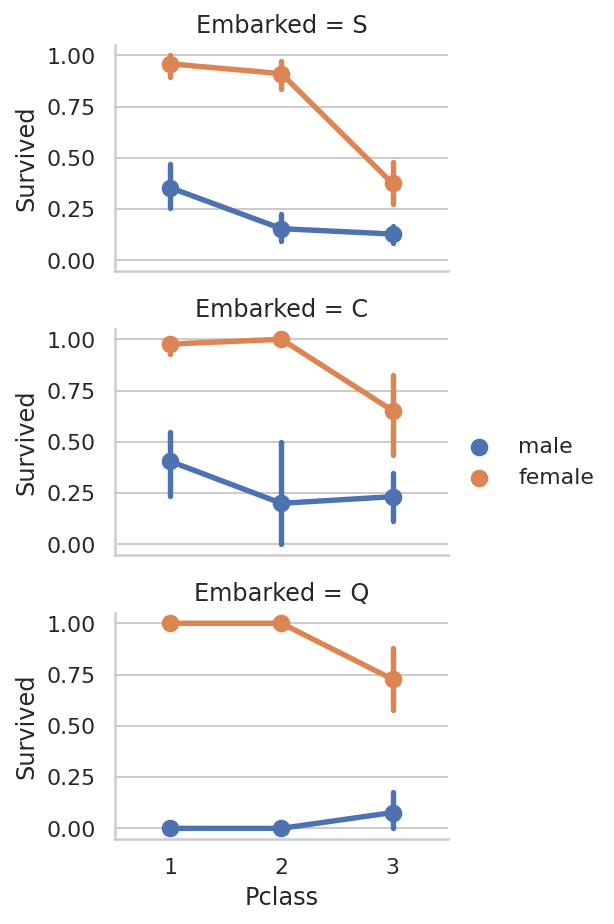

In [ ]:
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

### 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

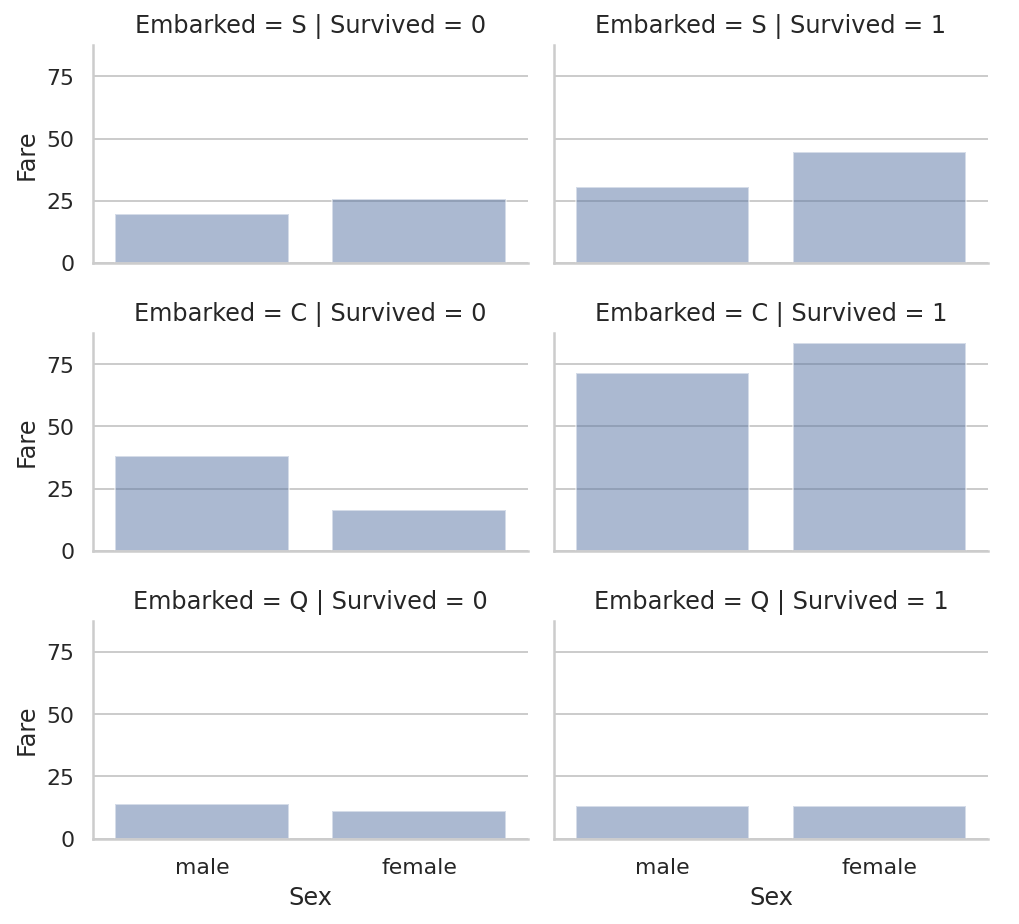

In [ ]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# x: 성별, y: 요금
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

- 승선지가 S또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음
<br />C = Cherbourg<br />Q = Queenstown<br />S = Southampton

In [ ]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

- 세 승선지 모두 3등급의 여성 승객 생존율이 1,2 등급에 비해 떨어진다.

### Ticket

In [ ]:
df_train['Ticket'].value_counts().head(15)

CA. 2343        7
1601            7
347082          7
347088          6
3101295         6
CA 2144         6
S.O.C. 14879    5
382652          5
2666            4
PC 17757        4
349909          4
113760          4
113781          4
19950           4
W./C. 6608      4
Name: Ticket, dtype: int64

Text(0.5, 1.0, 'Ticket num : 3000000 ~ ')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


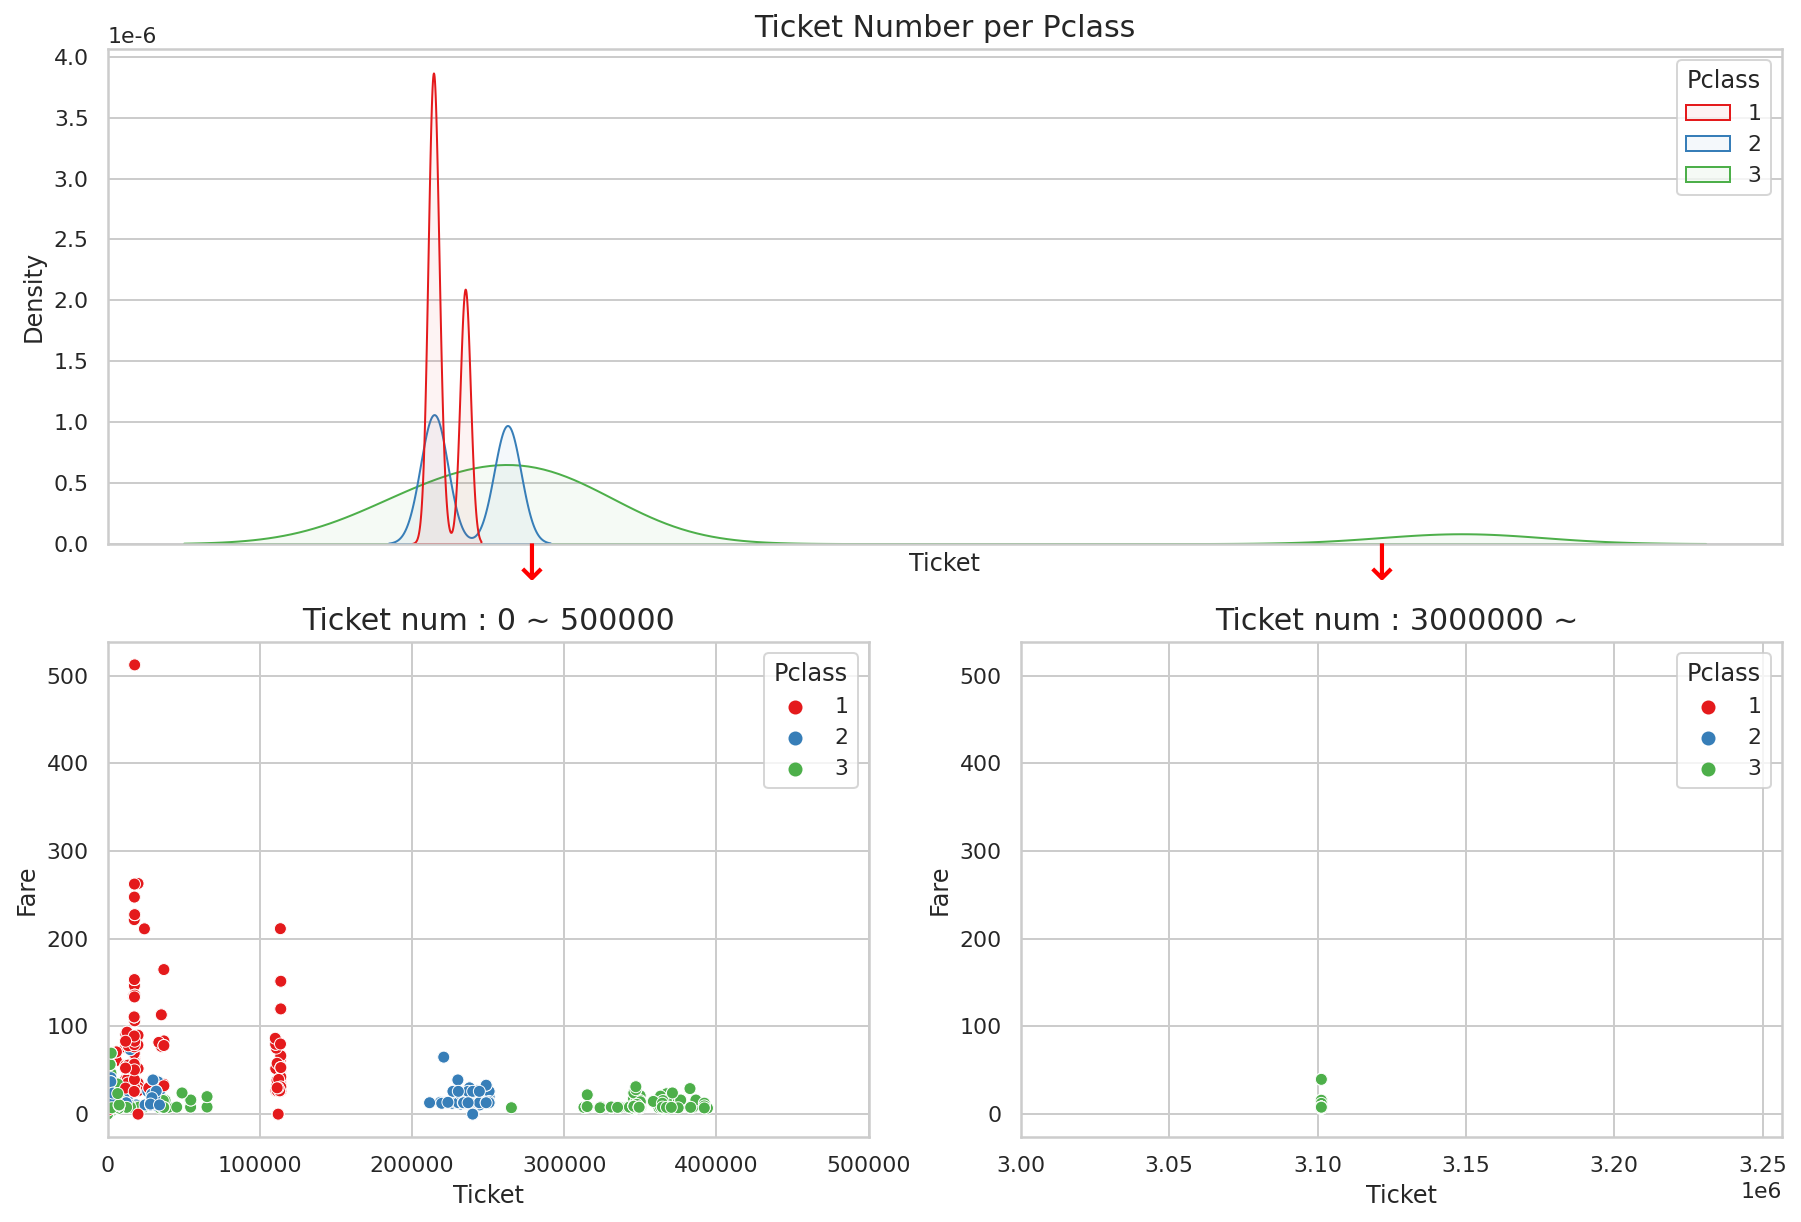

In [ ]:
# Ticket에서 숫자만 추출
tic_num = df_train['Ticket'].apply(lambda x: x.split(' ')[-1])
df_train['Ticket'] = tic_num.replace('LINE',0)
df_train['Ticket'] = df_train['Ticket'].apply(lambda x: int(x))

# plotting
plt.figure(figsize=(15,10))

plt.subplot(2,2,(1,2))
sns.kdeplot(data=df_train, x="Ticket", hue='Pclass',palette = 'Set1',fill=True,alpha=0.05)
plt.text(250000, -0.0000003,"↓",fontdict={'color':'red','size':25})
plt.text(2800000, -0.0000003,"↓",fontdict={'color':'red','size':25})
plt.xticks([])
plt.title('Ticket Number per Pclass', size=15)

plt.subplot(2,2,3)
sns.scatterplot(data=df_train, x="Ticket",y="Fare",hue="Pclass", palette="Set1")
plt.xlim(0,500000)
plt.title('Ticket num : 0 ~ 500000', size=15)

plt.subplot(2,2,4)
sns.scatterplot(data=df_train, x="Ticket",y="Fare",hue="Pclass", palette="Set1")
plt.xlim(3000000,)
plt.title('Ticket num : 3000000 ~ ', size=15)

### Fare

Text(0.5, 0.98, 'Fare(1 person) VS Ticket price(Team)')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


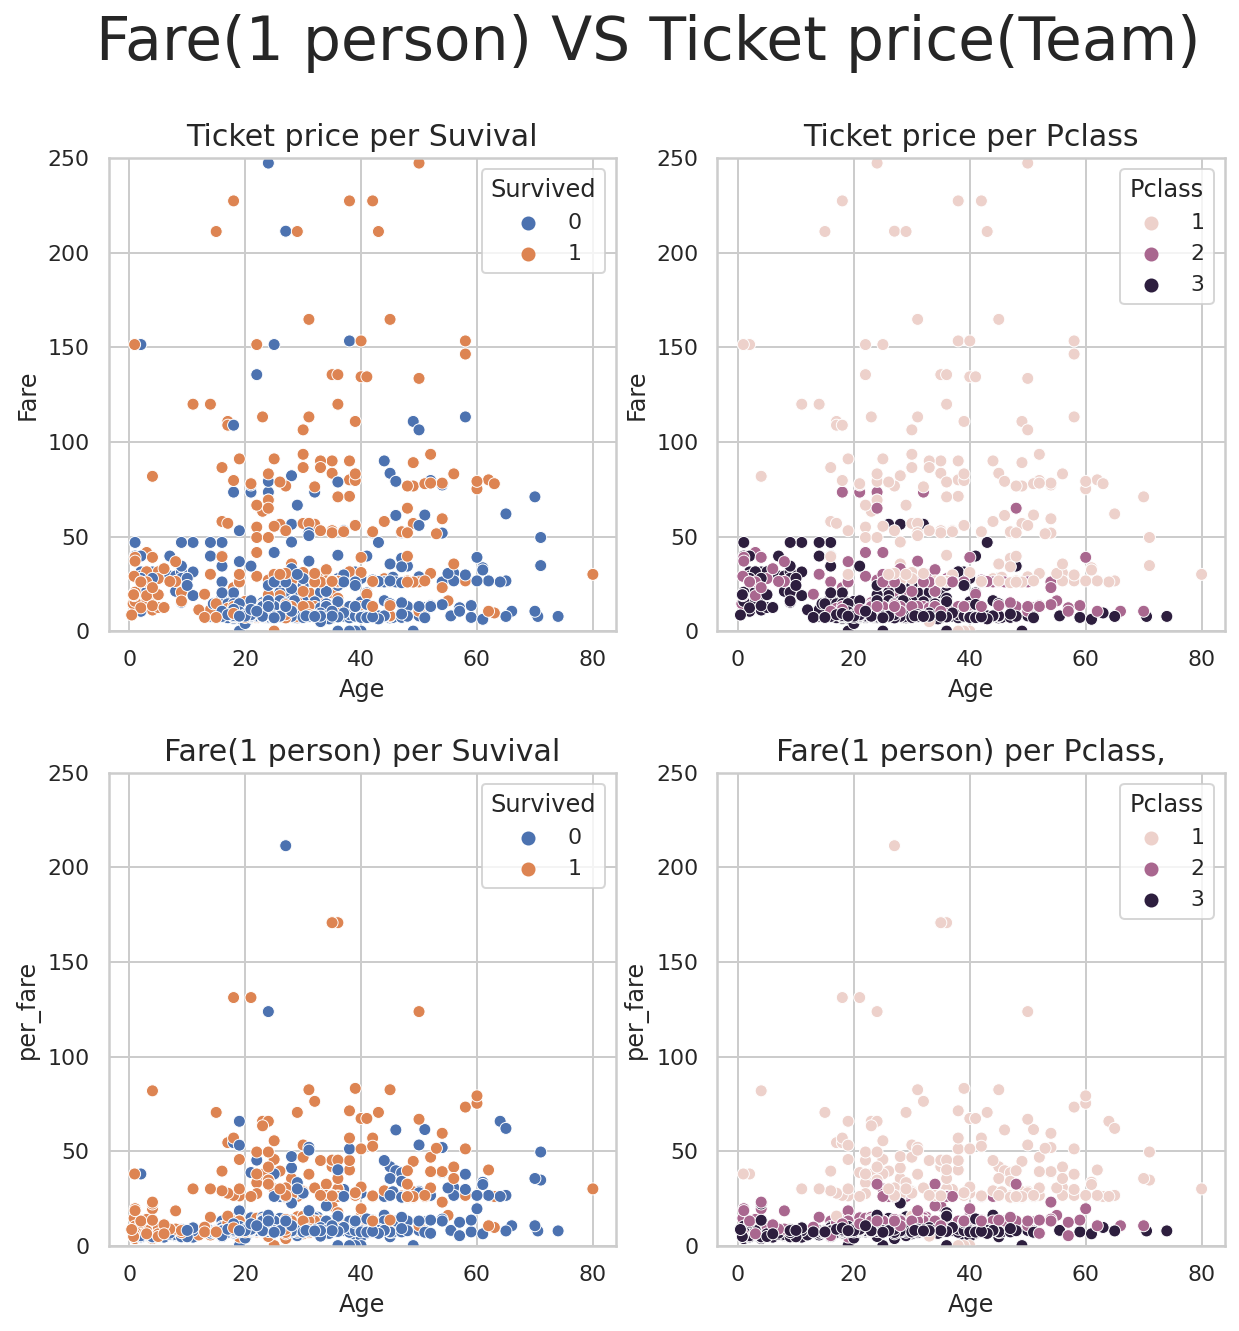

In [ ]:
# 인당 가격 컬럼 추가 (per_fare)
per_fare = df_train['Fare'].groupby(df_train['Ticket']).agg({('fare','mean'),('num','count')})
per_fare['per_fare'] = per_fare['fare']/per_fare['num']
per_fare.drop(['fare','num'], axis=1,inplace=True)
train = pd.merge(df_train, per_fare, on='Ticket')

# plotting
f, ax = plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(data=train, x='Age',y='Fare', hue='Survived',ax=ax[0,0])
sns.scatterplot(data=train, x='Age',y='Fare', hue='Pclass',ax=ax[0,1])
sns.scatterplot(data=train, x='Age',y='per_fare', hue='Survived',ax=ax[1,0])
sns.scatterplot(data=train, x='Age',y='per_fare', hue='Pclass',ax=ax[1,1])
ax[0,0].set_ylim(0,250)
ax[0,1].set_ylim(0,250)
ax[1,0].set_ylim(0,250)
ax[1,1].set_ylim(0,250)

ax[0,0].set_title('Ticket price per Suvival', size=15)
ax[0,1].set_title('Ticket price per Pclass', size=15)
ax[1,0].set_title('Fare(1 person) per Suvival', size=15)
ax[1,1].set_title('Fare(1 person) per Pclass,', size=15)

plt.subplots_adjust(hspace=0.3)
plt.suptitle('Fare(1 person) VS Ticket price(Team)', size=30)

# **4. Feature Engineering**

## **4.1 Binning Continuous Features**

### **4.1.1 Fare**
`Fare` feature is positively skewed and survival rate is extremely high on the right end. **13** quantile based bins are used for `Fare` feature. Even though the bins are too much, they provide decent amount of information gain. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate. This high survival rate was not visible in the distribution graph. There is also an unusual group **(15.742, 23.25]** in the middle with high survival rate that is captured in this process.

In [219]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

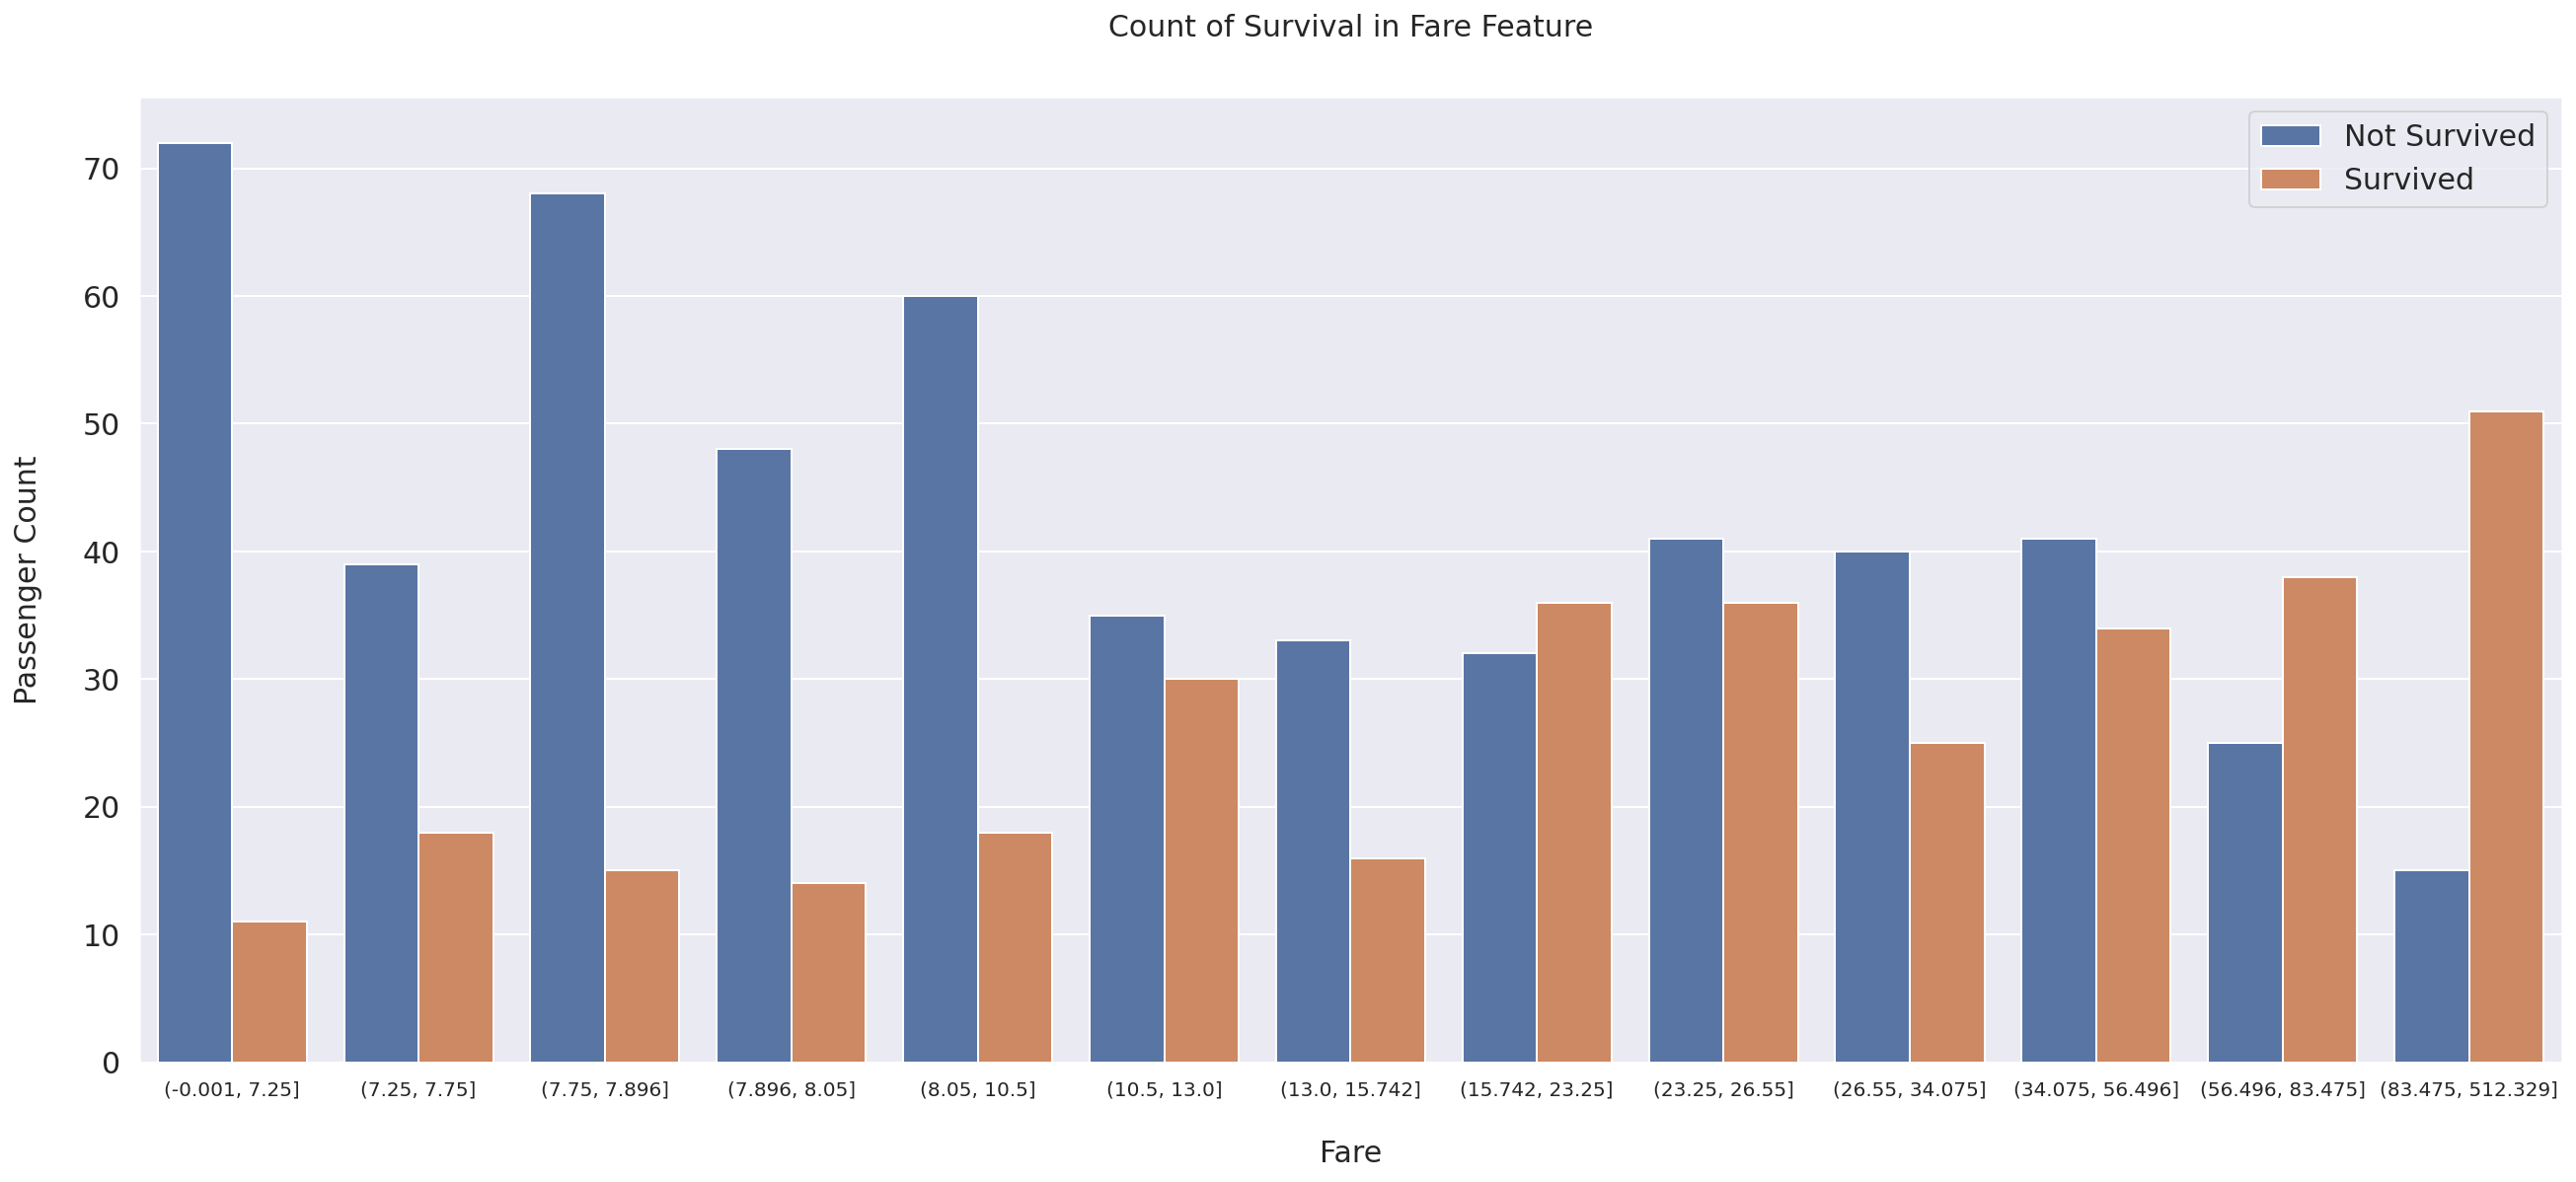

In [220]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

### **4.1.2 Age**
`Age` feature has a normal distribution with some spikes and bumps and **10** quantile based bins are used for `Age`. The first bin has the highest survival rate and 4th bin has the lowest survival rate. Those were the biggest spikes in the distribution. There is also an unusual group **(34.0, 40.0]** with high survival rate that is captured in this process.

In [221]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

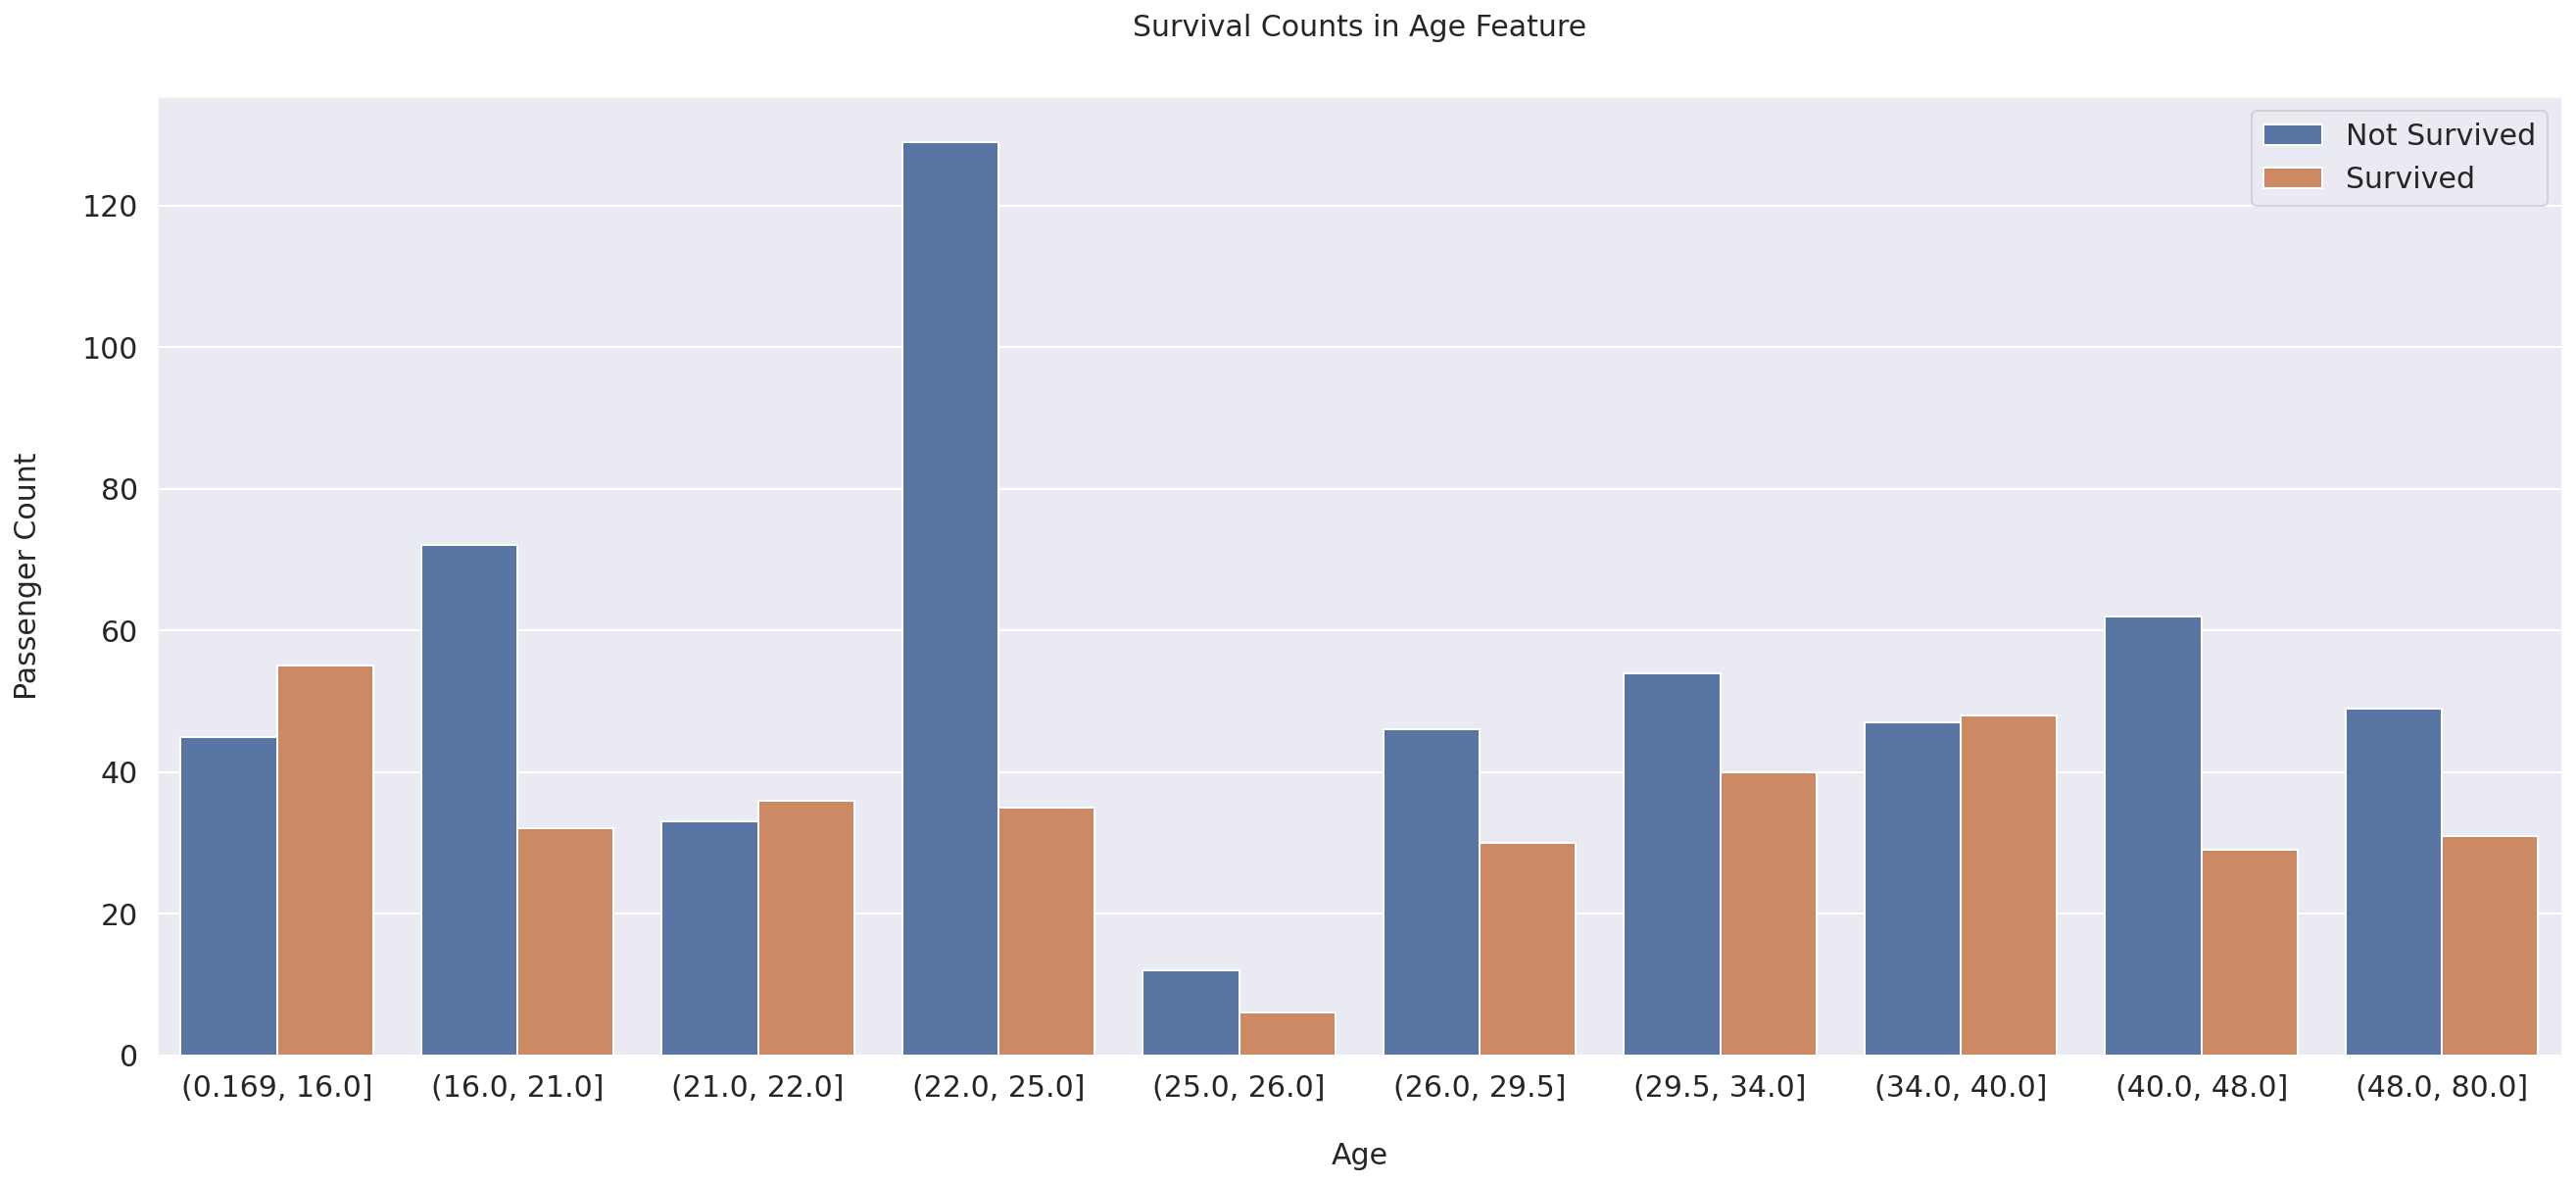

In [222]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

## **4.2 Frequency Encoding**
`Family_Size` is created by adding `SibSp`, `Parch` and **1**. `SibSp` is the count of siblings and spouse, and `Parch` is the count of parents and children. Those columns are added in order to find the total size of families. Adding **1** at the end, is the current passenger. Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.
* Family Size with **1** are labeled as **Alone**
* Family Size with **2**, **3** and **4** are labeled as **Small**
* Family Size with **5** and **6** are labeled as **Medium**
* Family Size with **7**, **8** and **11** are labeled as **Large**

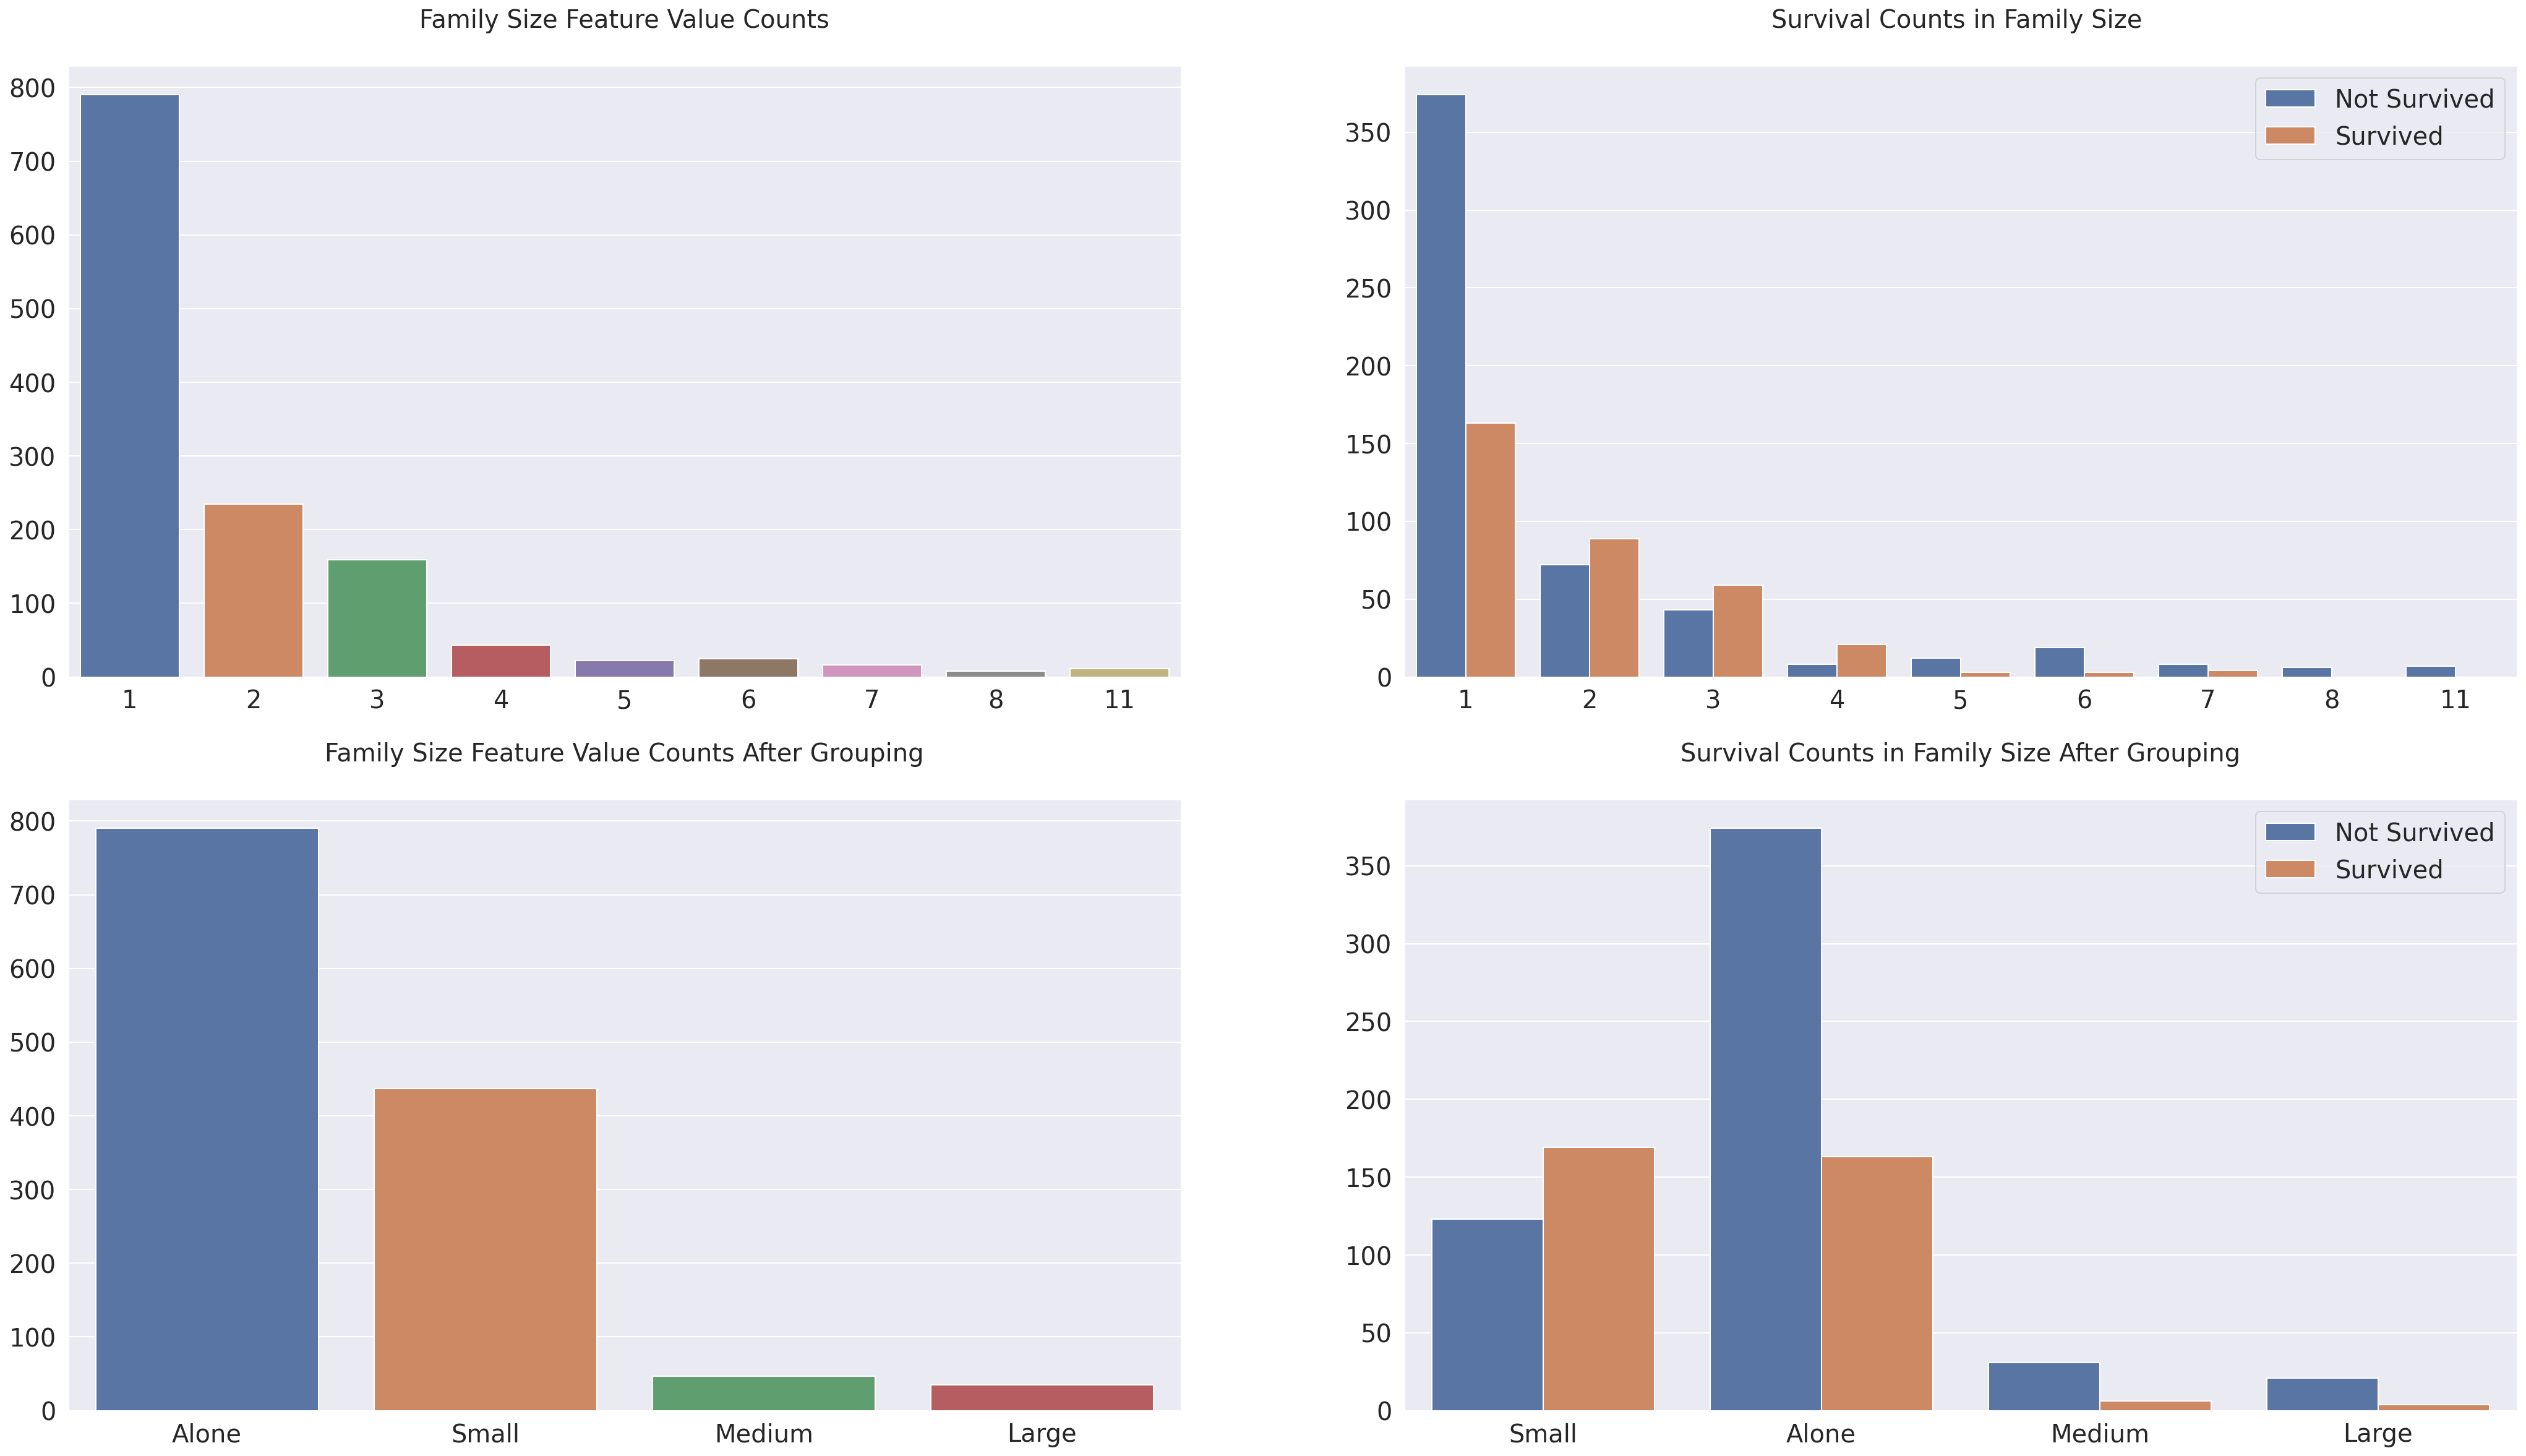

In [226]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

There are too many unique `Ticket` values to analyze, so grouping them up by their frequencies makes things easier.

**How is this feature different than `Family_Size`?** Many passengers travelled along with groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.

**Why not grouping tickets by their prefixes?** If prefixes in `Ticket` feature has any meaning, then they are already captured in `Pclass` or `Embarked` features because that could be the only logical information which can be derived from the `Ticket` feature.

According to the graph below, groups with **2**,**3** and **4** members had a higher survival rate. Passengers who travel alone has the lowest survival rate. After **4** group members, survival rate decreases drastically. This pattern is very similar to `Family_Size` feature but there are minor differences. `Ticket_Frequency` values are not grouped like `Family_Size` because that would basically create the same feature with perfect correlation. This kind of feature wouldn't provide any additional information gain.

In [227]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

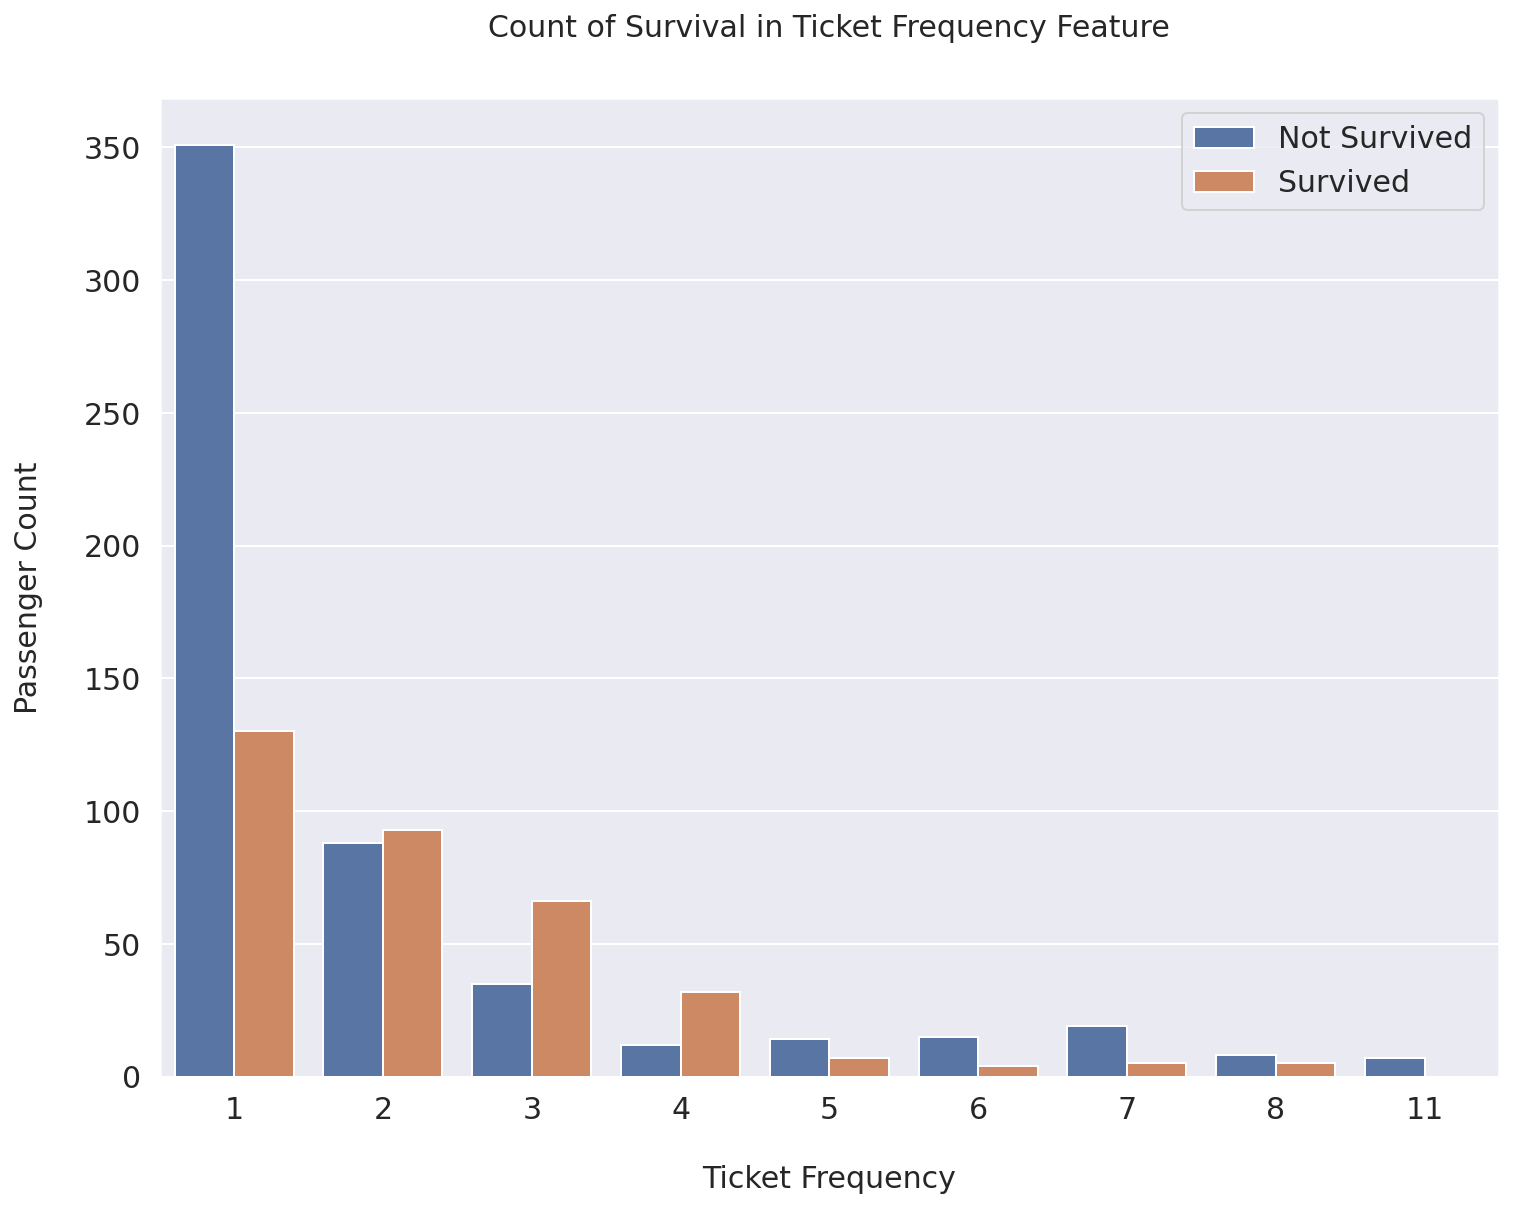

In [228]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

## **4.3 Title & Is Married**
`Title` is created by extracting the prefix before `Name` feature. According to graph below, there are many titles that are occuring very few times. Some of those titles doesn't seem correct and they need to be replaced. **Miss**, **Mrs**, **Ms**, **Mlle**, **Lady**, **Mme**, **the Countess**, **Dona** titles are replaced with **Miss/Mrs/Ms** because all of them are female. Values like **Mlle**, **Mme** and **Dona** are actually the name of the passengers, but they are classified as titles because `Name` feature is split by comma. **Dr**, **Col**, **Major**, **Jonkheer**, **Capt**, **Sir**, **Don** and **Rev** titles are replaced with **Dr/Military/Noble/Clergy** because those passengers have similar characteristics. **Master** is a unique title. It is given to male passengers below age **26**. They have the highest survival rate among all males.

`Is_Married` is a binary feature based on the **Mrs** title. **Mrs** title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

In [229]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

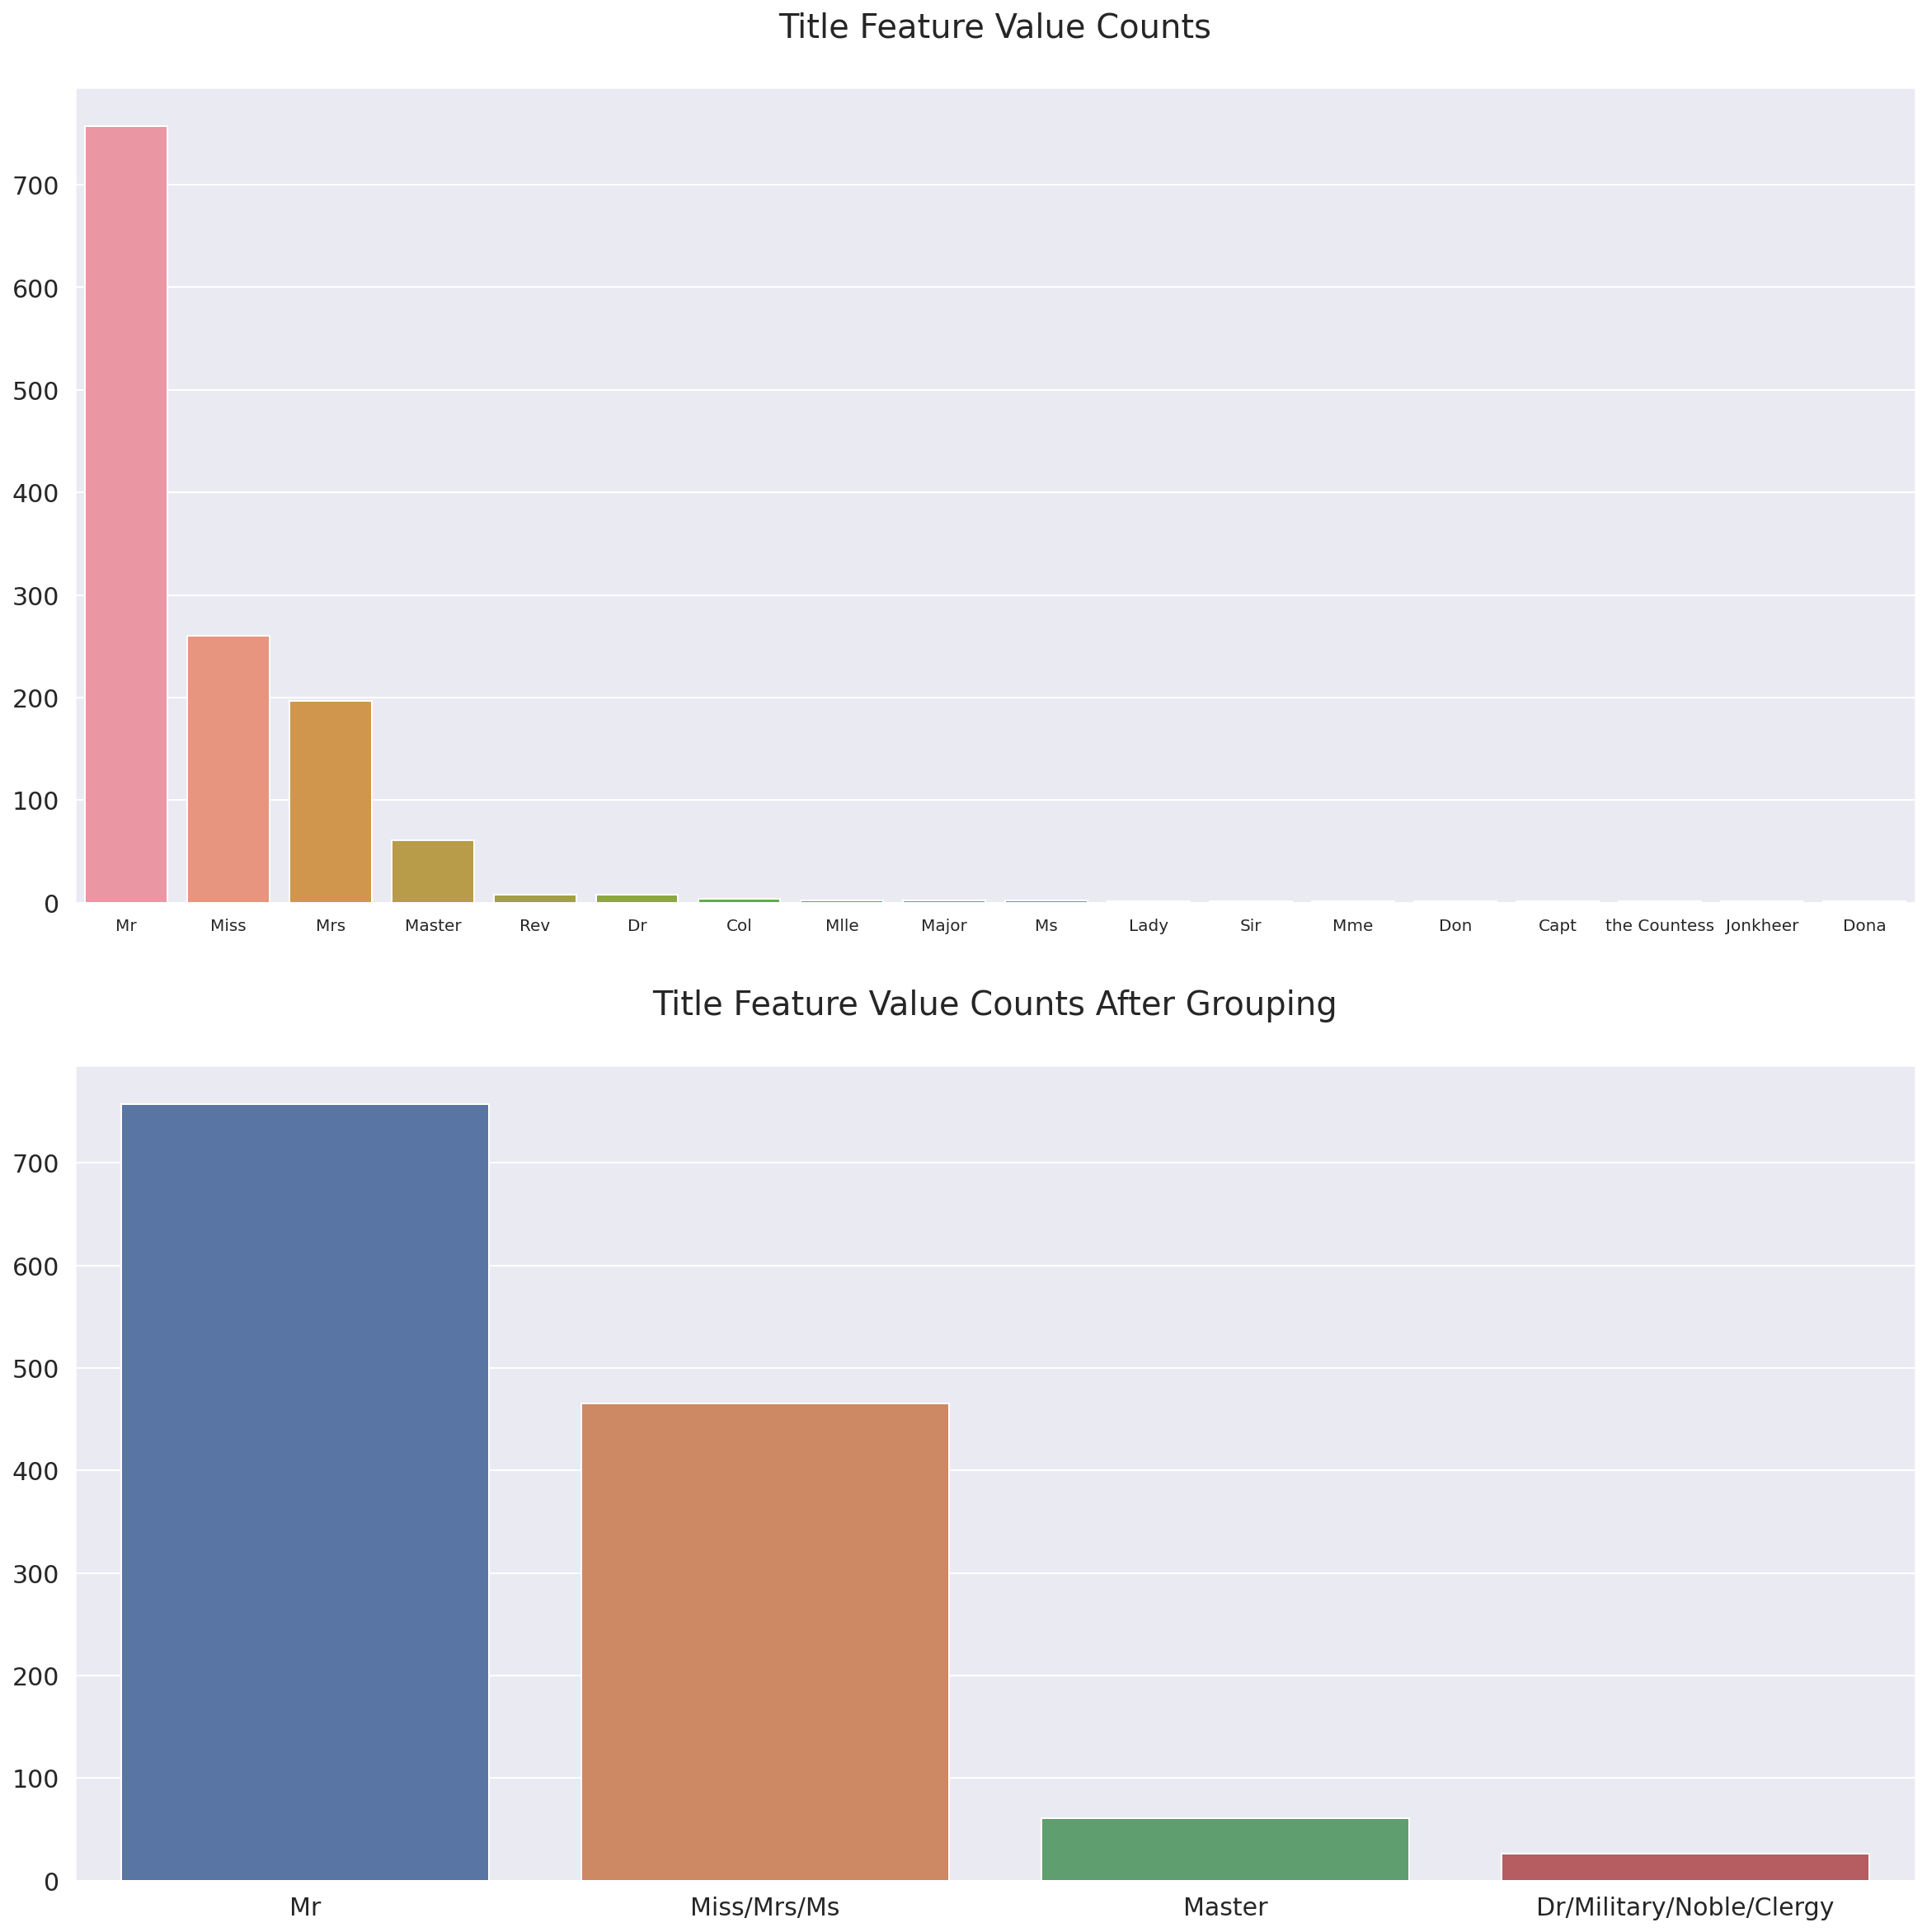

In [230]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

## **4.4 Target Encoding**
`extract_surname` function is used for extracting surnames of passengers from the `Name` feature. `Family` feature is created with the extracted surname. This is necessary for grouping passengers in the same family. 

In [253]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

`Family_Survival_Rate` is calculated from families in training set since there is no `Survived` feature in test set. A list of family names that are occuring in both training and test set (`non_unique_families`), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in `Family_Survival_Rate` feature.

An extra binary feature `Family_Survival_Rate_NA` is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

`Ticket_Survival_Rate` and `Ticket_Survival_Rate_NA` features are also created with the same method. `Ticket_Survival_Rate` and `Family_Survival_Rate` are averaged and become `Survival_Rate`, and `Ticket_Survival_Rate_NA` and `Family_Survival_Rate_NA` are also averaged and become `Survival_Rate_NA`.

In [243]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [245]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [246]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

## **4.5 Feature Transformation**

### **4.5.1 Label Encoding Non-Numerical Features**
`Embarked`, `Sex`, `Deck` , `Title` and `Family_Size_Grouped` are object type, and `Age` and `Fare` features are category type. They are converted to numerical type with `LabelEncoder`. `LabelEncoder` basically labels the classes from **0** to **n**. This process is necessary for models to learn from those features.

In [254]:
dfs[0]

Age Deck Embarked              Fare  \
0    (21.0, 22.0]    M        S    (-0.001, 7.25]   
1    (34.0, 40.0]  ABC        C  (56.496, 83.475]   
2    (25.0, 26.0]    M        S     (7.896, 8.05]   
3    (34.0, 40.0]  ABC        S  (34.075, 56.496]   
4    (34.0, 40.0]    M        S     (7.896, 8.05]   
..            ...  ...      ...               ...   
886  (26.0, 29.5]    M        S      (10.5, 13.0]   
887  (16.0, 21.0]  ABC        S   (26.55, 34.075]   
888  (21.0, 22.0]    M        S    (23.25, 26.55]   
889  (25.0, 26.0]  ABC        C   (26.55, 34.075]   
890  (29.5, 34.0]    M        Q      (7.25, 7.75]   

                                                  Name  ...  \
0                              Braund, Mr. Owen Harris  ...   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  ...   
2                               Heikkinen, Miss. Laina  ...   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...   
4                             Allen, Mr. William Henry  ...   
..                                                 ...  ...   
886                              Montvila, Rev. Juozas  ...   
887                       Graham, Miss. Margaret Edith  ...   
888           Johnston, Miss. Catherine Helen "Carrie"  ...   
889                              Behr, Mr. Karl Howell  ...   
890                                Dooley, Mr. Patrick  ...   

     Family_Size_Grouped     Family  Ticket_Frequency  \
0                  Small     Braund                 1   
1                  Small    Cumings                 2   
2                  Alone  Heikkinen                 1   
3                  Small   Futrelle                 2   
4                  Alone      Allen                 1   
..                   ...        ...               ...   
886                Alone   Montvila                 1   
887                Alone     Graham                 1   
888                Small   Johnston                 4   
889                Alone       Behr                 1   
890                Alone     Dooley                 1   

                        Title  Is_Married  
0                          Mr           0  
1                 Miss/Mrs/Ms           1  
2                 Miss/Mrs/Ms           0  
3                 Miss/Mrs/Ms           1  
4                          Mr           0  
..                        ...         ...  
886  Dr/Military/Noble/Clergy           0  
887               Miss/Mrs/Ms           0  
888               Miss/Mrs/Ms           0  
889                        Mr           0  
890                        Mr           0  

[891 rows x 18 columns]

In [255]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature].astype(str))

In [256]:
for df in dfs:
    for feature in non_numeric_features:   
      print(df[feature])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      3
1      0
2      3
3      0
4      3
      ..
886    3
887    0
888    3
889    0
890    3
Name: Deck, Length: 891, dtype: int64
0      3
1      3
2      0
3      3
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_Size_Grouped, Length: 891, dtype: int64
0      2
1      7
2      4
3      7
4      7
      ..
886    5
887    1
888    2
889    4
890    6
Name: Age, Length: 891, dtype: int64
0       0
1       7
2      10
3       6
4      10
       ..
886     1
887     5
888     4
889     5
890     8
Name: Fare, Length: 891, dtype: int64
891     1
892     2
893     1
894     2
895     2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Name: Embarked, Length: 418, dtype: int6

### **4.5.2 One-Hot Encoding the Categorical Features**
The categorical features (`Pclass`, `Sex`, `Deck`, `Embarked`, `Title`) are converted to one-hot encoded features with `OneHotEncoder`. `Age` and `Fare` features are not converted because they are ordinal unlike the previous ones.

In [257]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)


## **4.6 Conclusion**
- 빈도 기반으로 변수처리 : Age, Fare  (이상값 처리에 좋음)
- 파생변수 도출: 결혼여부(Name에서 추출), 가족생존율(Name의 성에서 추출)
- 범주형 변수는 one-hot 인코딩으로 처리됨

`Age` and `Fare` features are binned. Binning helped dealing with outliers and it revealed some homogeneous groups in those features. `Family_Size` is created by adding `Parch` and `SibSp` features and **1**. `Ticket_Frequency` is created by counting the occurence of `Ticket` values.

`Name` feature is very useful. First, `Title` and `Is_Married` features are created from the title prefix in the names. Second, `Family_Survival_Rate` and `Family_Survival_Rate_NA`  features are created by target encoding the surname of the passengers. `Ticket_Survival_Rate` is created by target encoding the `Ticket` feature. `Survival_Rate` feature is created by averaging the `Family_Survival_Rate` and `Ticket_Survival_Rate` features.

Finally, the non-numeric type features are label encoded and categorical features are one-hot encoded. Created **5** new features (`Family_Size`, `Title`, `Is_Married`, `Survival_Rate` and `Survival_Rate_NA`) and dropped the useless features after encoding.

In [259]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title']
            # 'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

Age  Deck_1  Deck_2  Deck_3  Deck_4  ...  Ticket_Frequency  Title_1  \
0    2     0.0     0.0     0.0     1.0  ...                 1      0.0   
1    7     1.0     0.0     0.0     0.0  ...                 2      0.0   
2    4     0.0     0.0     0.0     1.0  ...                 1      0.0   
3    7     1.0     0.0     0.0     0.0  ...                 2      0.0   
4    7     0.0     0.0     0.0     1.0  ...                 1      0.0   

   Title_2  Title_3  Title_4  
0      0.0      0.0      1.0  
1      0.0      1.0      0.0  
2      0.0      1.0      0.0  
3      0.0      1.0      0.0  
4      0.0      0.0      1.0  

[5 rows x 24 columns]

# 5.Model

In [260]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 24)
y_train shape: (891,)
X_test shape: (418, 24)


## **5.1 Random Forest**
Created 2 `RandomForestClassifier`'s. One of them is a single model and the other is for k-fold cross validation.

The highest accuracy of the `single_best_model` is **0.82775** in public leaderboard. However, it doesn't perform better in k-fold cross validation. It is a good model to start experimenting and hyperparameter tuning.

The highest accuracy of `leaderboard_model` is **0.83732** in public leaderboard with 5-fold cross validation. This model is created for leaderboard score and it is tuned to overfit slightly. It is designed to overfit because the estimated probabilities of `X_test` in every fold are going to be divided by **N** (fold count). If this model is used as a single model, it would struggle to predict lots of samples correctly.

**Which model should I use?** 
* `leaderboard_model` overfits to test set so it's not suggested to use models like this in real life projects.
* `single_best_model` is a good model to start experimenting and learning about decision trees.

In [261]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

`StratifiedKFold` is used for stratifying the target variable. The folds are made by preserving the percentage of samples for each class in target variable (`Survived`).

In [262]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df_all.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    leaderboard_model.fit(X_train[trn_idx], y_train[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 1 OOB Score: 0.8412921348314607

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 2 OOB Score: 0.8246844319775596

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 3 OOB Score: 0.8373071528751753

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 4 OOB Score: 0.82328190743338

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 5 OOB Score: 0.82328190743338

Average OOB Score: 0.8299695069101911


## **5.2 Feature Importance**

In [263]:
importances

Fold_1    Fold_2    Fold_3    Fold_4    Fold_5
Age               0.036380  0.031371  0.034012  0.040027  0.040299
Deck_1            0.030697  0.037189  0.034025  0.039581  0.041138
Deck_2            0.054446  0.056757  0.058405  0.052316  0.062774
Deck_3            0.029460  0.031330  0.030044  0.031377  0.028079
Deck_4            0.031343  0.038867  0.033301  0.037552  0.035025
...                    ...       ...       ...       ...       ...
Ticket_Frequency  0.142818  0.164082  0.158987  0.136551  0.146294
Title_1           0.011342  0.009770  0.011176  0.009514  0.010785
Title_2           0.009471  0.005701  0.004072  0.002372  0.005479
Title_3           0.014224  0.015014  0.017182  0.014795  0.012461
Title_4           0.022518  0.018726  0.035304  0.026110  0.034123

[24 rows x 5 columns]

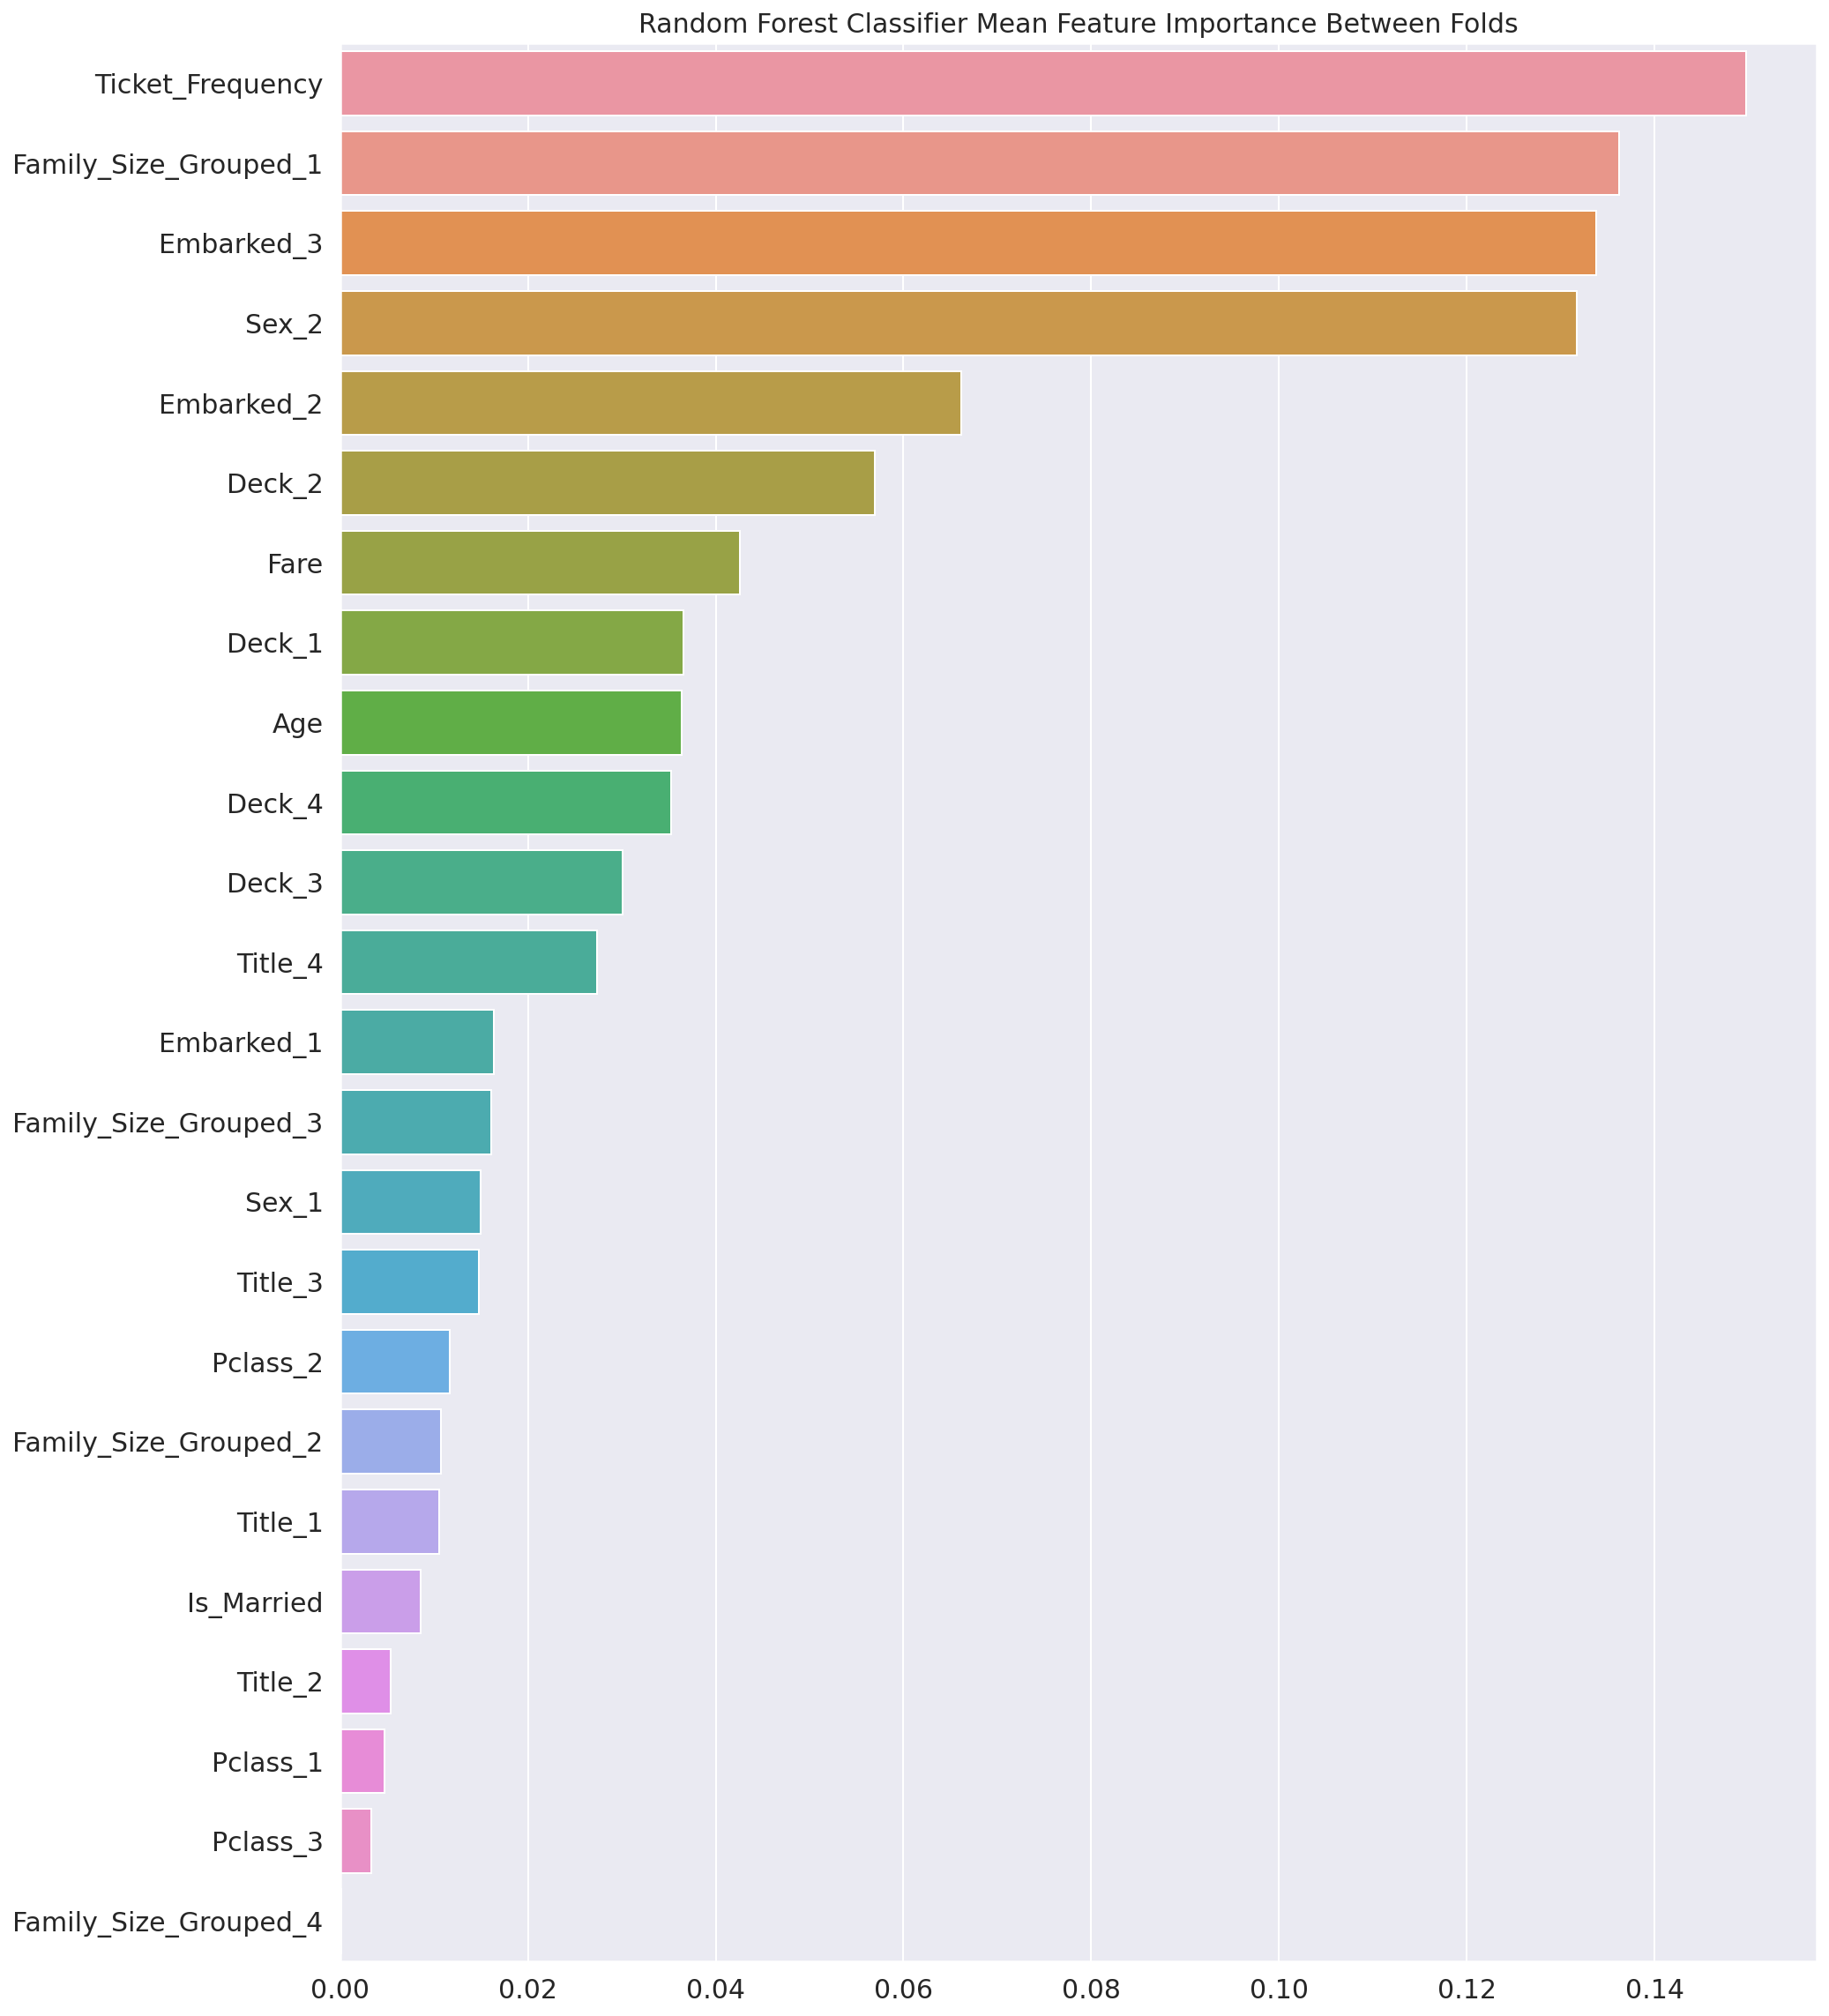

In [264]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()

## **5.3 ROC Curve**

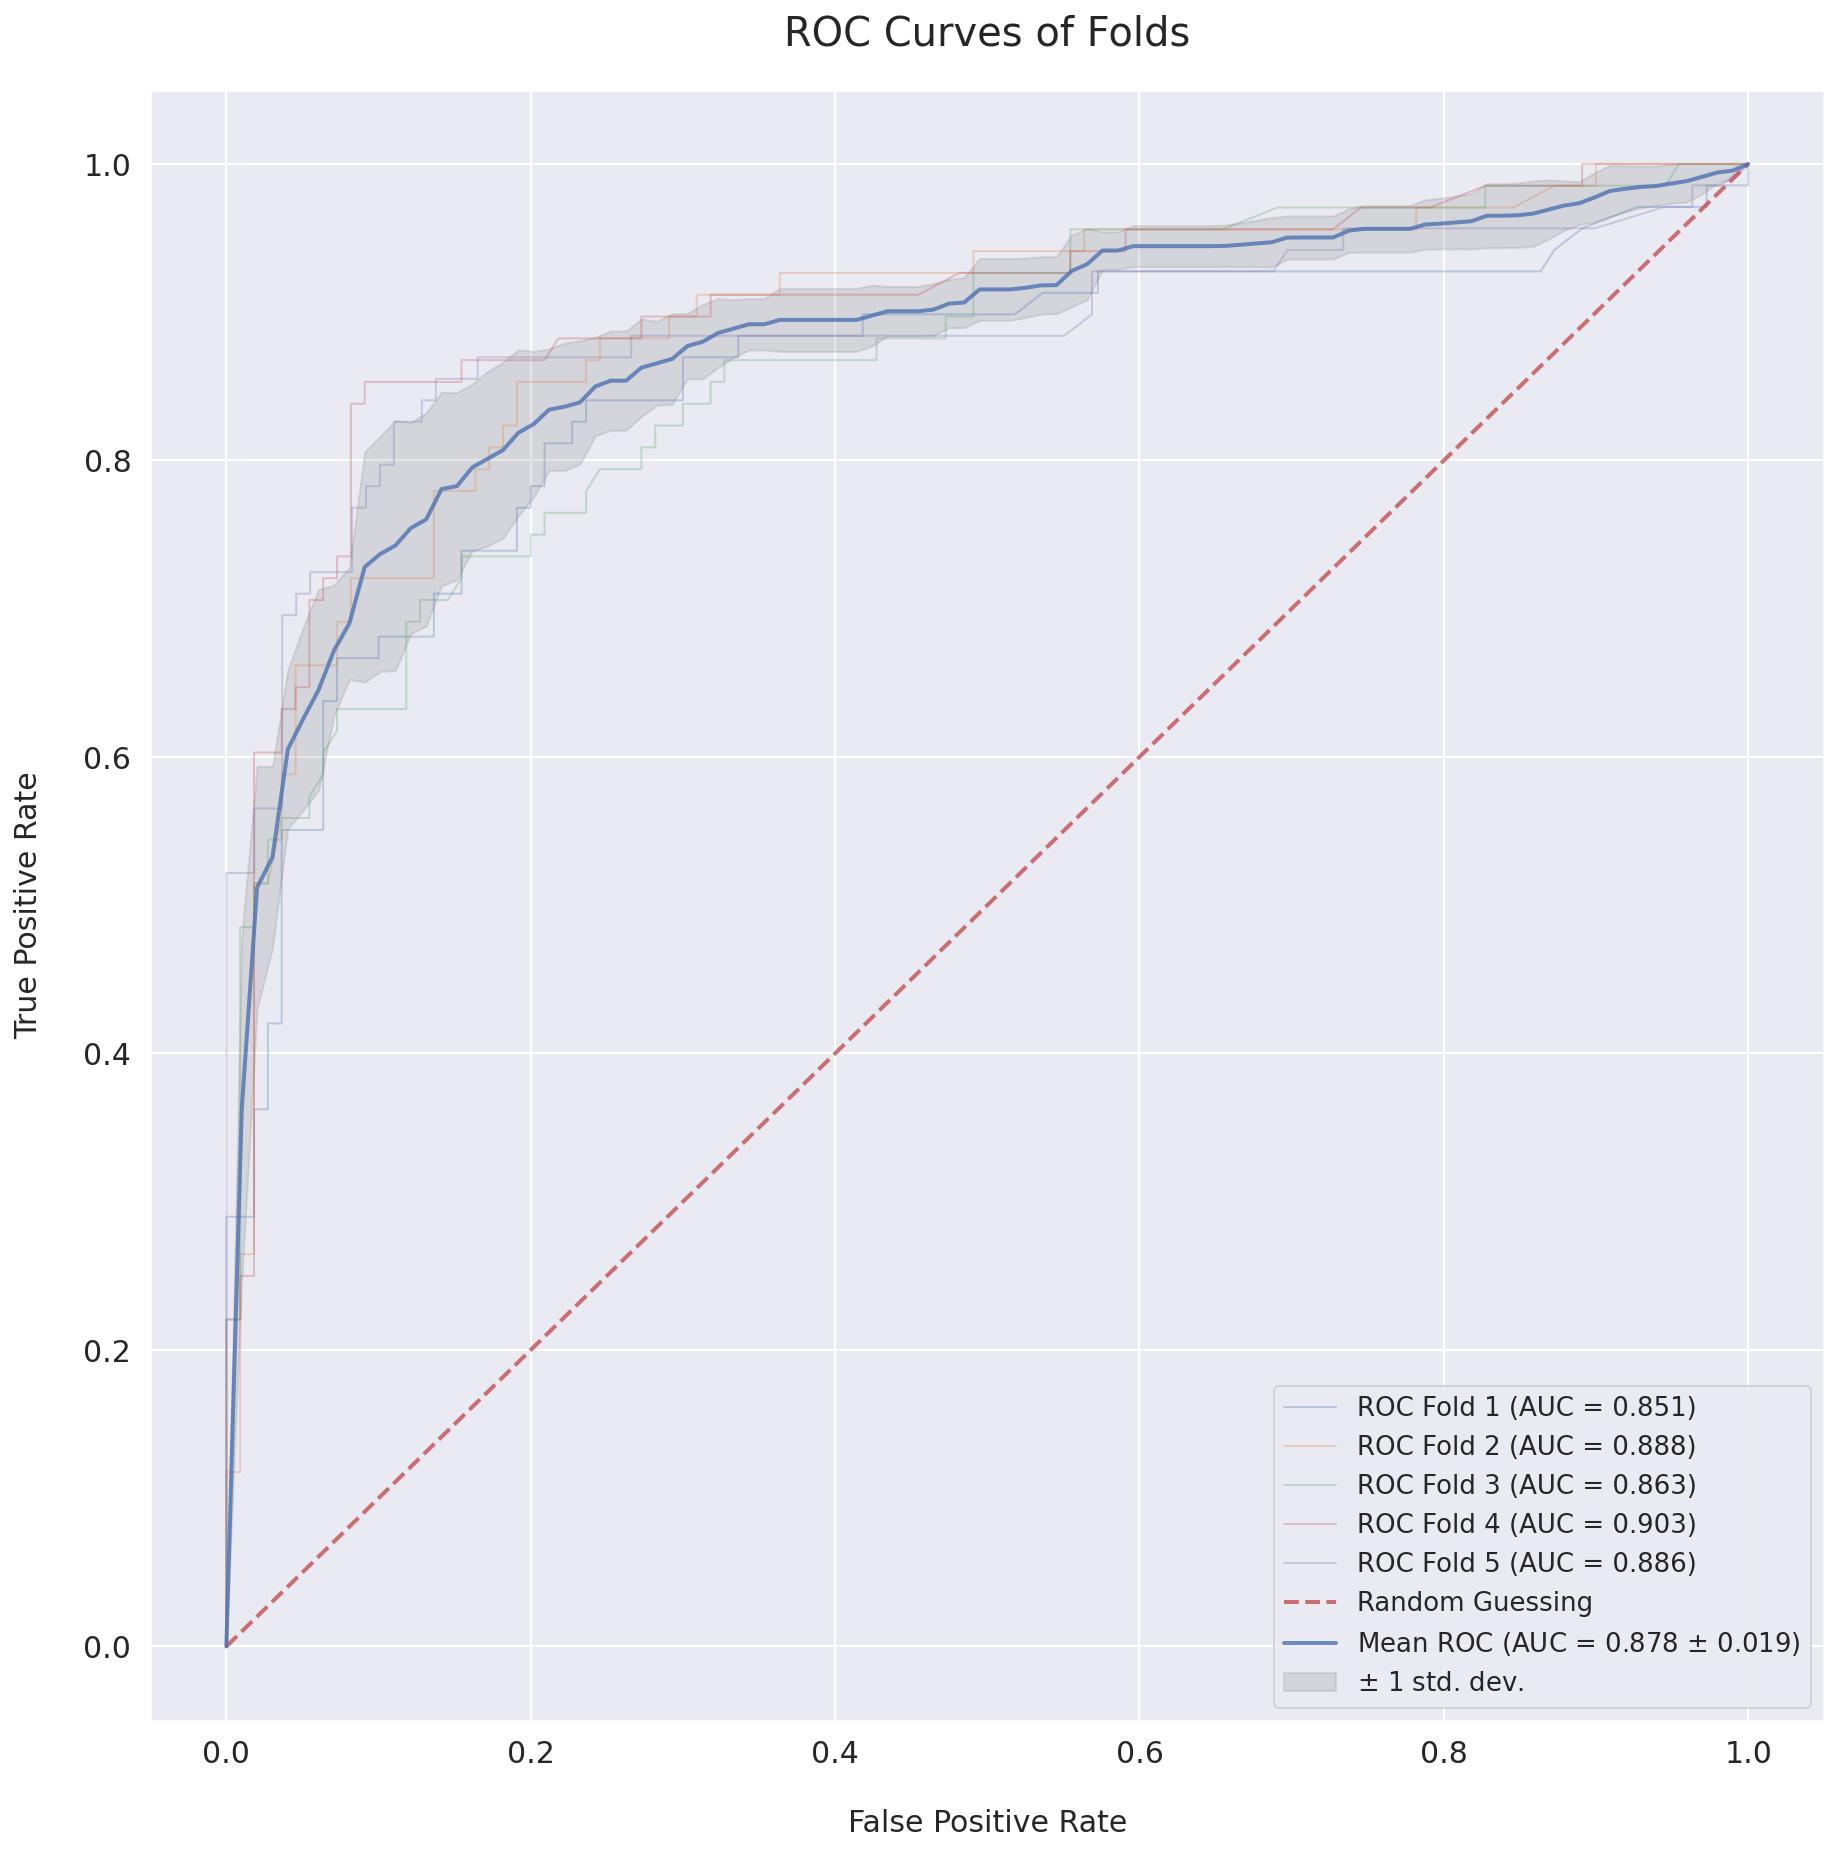

In [265]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

## **5.4 Submission**

In [266]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

PassengerId  Survived
891          892         0
892          893         1
893          894         0
894          895         0
895          896         1
896          897         0
897          898         1
898          899         0
899          900         1
900          901         0

# 6.Feature Engineering & Initial Modeling 변수 선택 및 모델 구축

- 학습 모델에 학습을 시킬 데이터는 모두 숫자형 데이터이어야 한다.
- 사용할 Feature만 선택하기

Categorical Feature : Name, Sex, Ticket, Cabin, Embarked

Ordinal Feature : Pclass

Numeric Feature : PassengerId, Age, SibSp, Parch, Fare

In [ ]:
feature_1 = ['Survived','Pclass','Sex','Age_bin','Family_size','Fare','Embarked','Name_fix']

## 1) sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

## 2) sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델


# 7.Model Tuning & Evaluation 모델 학습 및 검증

### 1) model.fit()
- 모델 학습

### 2) model.predict()
- 모델 예측

### 3) model.predict_proba()
- 모델 예측

### 4) pd.DataFrame.to_csv()
- csv파일 저장

# 8.Conclusion & Discussion 결과 및 결언

---

# 💡 용어 정리
1. **랜덤 포레스트**
- 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표(?) 같은 것
- 앙상블(ensemble) 학습법 : 좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 걸 
- 랜덤 포레스트에서 각 나무들을 어떻게 생성하는지?
- 배깅(bagging) : 임의로 100개씩 행을 선택해서 의사결정 트리를 만드는 것 
  - 중복을 허용
  - 트리를 만들 때 사용될 속성(feature)들을 제한함으로써 각 나무들에 다양성을 줘야 한다.
  - 각 분할에서 전체 속성들 중 일부만 고려하여 트리를 작성하도록 하는 전략
- scikit-learn을 사용해 구현
  - `sklearn.ensemble` 모듈에서 `RandomForestClassifier`를 불러오면 된다. 단, 숲을 만들 때 나무의 개수를 `n_estimators`라는 파라미터로 지정해주어야 한다.